# Diagrams for secon paper V2

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as pe
from matplotlib.patches import FancyBboxPatch, Circle
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'cm'  # Use Computer Modern math fonts
mpl.rcParams['font.family'] = 'STIXGeneral'  # Use STIX fonts (similar to Computer Modern)
plt.rcParams.update({'font.size': 16})

#speed of light m/s
c=299792458

cs = {"y":'#ffb000',
      "o":'#fe6100',
      "m":'#dc267f',
      "p":'#785ef0',
      "b":'#648fff'}


# Create a colormap that works well for log color scales.
# It's important to use a perceptually uniform colormap for log scales, or else transitions can look odd.
# The following creates a custom Sequential colormap, but you can also try alternatives like mpl.cm.viridis or mpl.cm.inferno for log scales.
from matplotlib.colors import ListedColormap

colors_continuous = [cs["b"], cs["p"], cs["m"], cs["o"], cs["y"]]
cmap_cont = LinearSegmentedColormap.from_list("ibm_cb", colors_continuous, N=256)

# For log-scaled images, use a perceptually uniform colormap, but if you want to use your color scheme,
# use ListedColormap for sharp color transitions, or LinearSegmentedColormap for a continuous one as above.
# To explicitly support log color scales, you could also check matplotlib's built-in log-friendly colormaps:
# For example: cmap_cont = plt.cm.viridis

Assume guassian pulses and convert with $$\Delta \lambda_{FWHM}=\frac{1550^2}{c}\frac{0.441}{\Delta t_{FWHM}}$$ Also assume that $\Delta \lambda=3\Delta \lambda_{FWHM}$


Text(0, 0.5, 'Bandwidth [nm]')

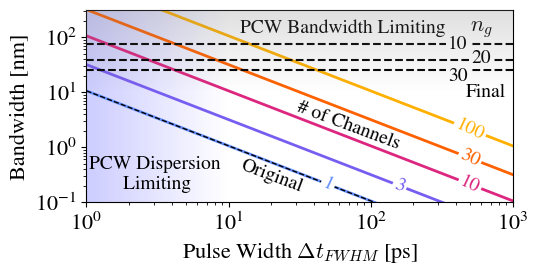

In [183]:
fig = plt.figure(figsize=(5.5,2.5))

fwhm = lambda x: (1550**2*0.441/c/x)*1e-6
xsmin,xsmax = 10**0,10**3
bwsmin,bwsmax = 10**-1,10**2.5
xs = np.logspace(np.log10(xsmin),np.log10(xsmax),1000)
bws = np.logspace(np.log10(bwsmin),np.log10(bwsmax),1000)


# Define annotation points (x positions) and labels
label_xs = [50, 160, 500, 500, 500]
label_texts = [
    r"1",
    r"3",
    r"10",
    r"30",
    r"100"
]

chanels = [1,3,10,30,100]
for i, (chanel, color) in enumerate(zip(chanels, list(cs.values())[::-1])):
    y = (3*fwhm(xs)*chanel)*1e9
    plt.plot(xs,y,color=color,linewidth=2)

    if i == 0:
        plt.plot(xs,y,color='k',linewidth=1,linestyle='--')

    # Get annotation position for this curve
    x_annot = label_xs[i]
    idx = (np.abs(xs - x_annot)).argmin()
    y_annot = y[idx]
    
    plt.text(
        x_annot, y_annot,
        label_texts[i],
        color=color,
        fontsize=14,
        ha='center', va='center',
        rotation=-25,
        bbox=dict(facecolor='white', edgecolor='none', pad=1.7, alpha=1)
    )

plt.text(
        70,2.5,
        '# of Channels',
        color='k',
        fontsize=14,
        ha='center', va='center',
        rotation=-20.5,
)

plt.text(
    20,.3,
        'Original',
        color='k',
        fontsize=14,
        ha='center', va='center',
        rotation=-20.5,
)

plt.text(
    650,10,
        'Final',
        color='k',
        fontsize=14,
        ha='center', va='center', zorder=30
)

plt.axhline(25,color='k',linestyle='--')
plt.axhline(38,color='k',linestyle='--')
plt.axhline(75,color='k',linestyle='--')

text_kwargs = dict(
    color='k',
    fontsize=14,
    ha='center',
    va='center',
    bbox=dict(facecolor='white', edgecolor='none', pad=1.7, alpha=1),
    zorder=5
)
plt.text(410,75,'10',**text_kwargs)
plt.text(600,42,'20',**text_kwargs)
plt.text(410,20,'30',**text_kwargs)

# Faded horizontal shaded region: y in [10,1e3]
ymin, ymax = 10, bwsmax
nsteps = 200
ys = np.logspace(np.log10(ymin), np.log10(ymax), nsteps)
for i in range(nsteps - 1):
    alpha = 0.00 + 0.25 * (i / (nsteps - 1))  # Fades in as y increases
    plt.fill_between([plt.xlim()[0], plt.xlim()[1]], ys[i], ys[i+1], 
                     color='gray', alpha=alpha, edgecolor=None,zorder=10)

# Faded vertical shaded region: x in [1000,10000]
xmin, xmax = 10, 1
nsteps = 200
xs = np.logspace(np.log10(xmin), np.log10(xmax), nsteps)
for i in range(nsteps - 1):
    alpha = 0.00 + 0.20 * (i / (nsteps - 1))  # Fades in as x increases
    plt.fill_betweenx([plt.ylim()[0], plt.ylim()[1]], xs[i], xs[i+1], 
                      color='blue', alpha=alpha, edgecolor=None)



plt.text(12, 1.5e2, 'PCW Bandwidth Limiting', color='k', ha='left', va='center', fontsize=14)
plt.text(1.05, 1.5e-1, 'PCW Dispersion\n       Limiting', color='k', ha='left', va='bottom', fontsize=14)

plt.text(600,140,r'$n_g$',color='k',ha='center',va='center',fontsize=16)


plt.ylim(bwsmin,bwsmax)
plt.xlim(xsmin,xsmax)
plt.yscale('log')
plt.xscale('log')

plt.xlabel(r"Pulse Width $\Delta t_{FWHM}$ [ps]")
plt.ylabel("Bandwidth [nm]")

Text(0, 0.5, 'Bandwidth [nm]')

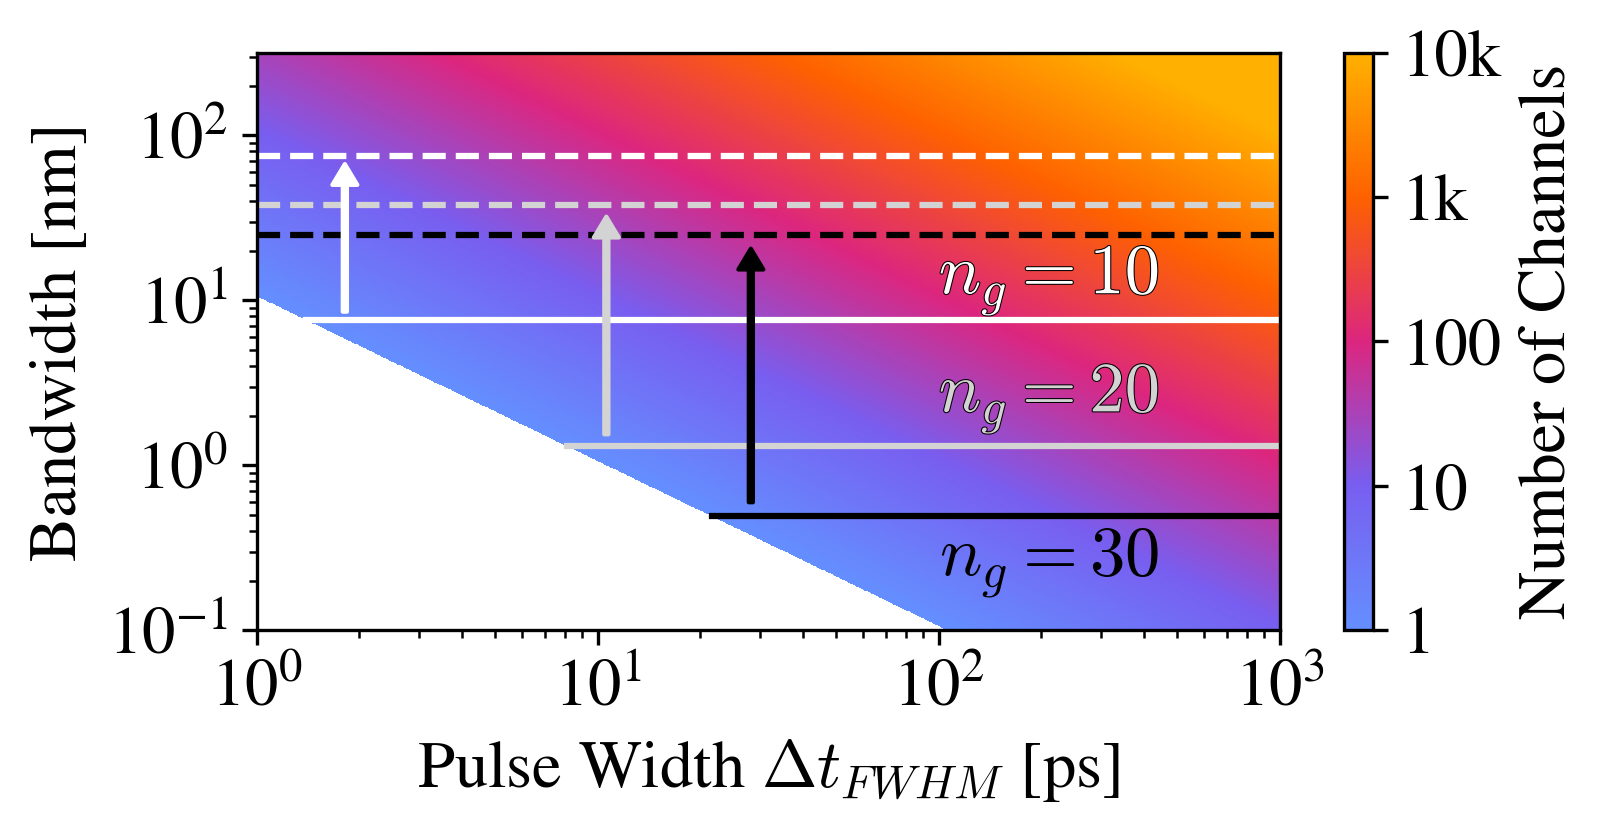

In [185]:
fig = plt.figure(figsize=(5.5,2.5),dpi=300)

fwhm = lambda x: (1550**2*0.441/c/x)*1e-6
xsmin,xsmax = 10**0,10**3
bwsmin,bwsmax = 10**-1,10**2.5
xs = np.logspace(np.log10(xsmin),np.log10(xsmax),1000)
bws = np.logspace(np.log10(bwsmin),np.log10(bwsmax),1000)


X,Y = np.meshgrid(xs,bws)
Z = Y/1e9/3/fwhm(X)

# Mask for values where log10(Z) < 0 (i.e., Z < 1)
logZ = np.log10(Z)
masked_logZ = np.ma.masked_where(logZ < 0, logZ)
# Create a new colormap with the same as cmap_cont but set "bad" values to white
cmap_mod = cmap_cont.with_extremes(bad='white')
plt.pcolormesh(X, Y, masked_logZ, cmap=cmap_mod, vmin=0, vmax=4)
cbar = plt.colorbar(label='Number of Channels')
# Example: manually set tick positions and their string labels
cbar.set_ticks([0, 1, 2, 3, 4])
cbar.set_ticklabels(['1', '10', '100', '1k', '10k'])  # Change as desired
 
pop_colors = ["black", "lightGray", "white"]
plt.axhline(25, color=pop_colors[0], linestyle='--')
plt.axhline(38, color=pop_colors[1], linestyle='--')
plt.axhline(75, color=pop_colors[2], linestyle='--')

# Draw a horizontal line between xsmin and xsmax at each y value, with points at both ends
ys_vals = [0.49, 1.3, 7.6]

arrows_y_top = [25, 38, 75]  # y-values for the top lines
arrows_y_bot = ys_vals       # y-values for the bottom lines

# Calculate x_start for each arrow (the left end of the dashed segment)
for y_bot, y_top, color in zip(arrows_y_bot, arrows_y_top, pop_colors):
    m = 1 / y_bot * 1e9 * 3 / c * 1e-6 * 1550 ** 2 * 0.441
    plt.plot([m, xsmax], [y_bot, y_bot], color=color, linestyle='-')
    # Add arrow - choose x position slightly right of m for visual clarity
    x_arrow = m * 1.3
    if x_arrow > xsmax:  # stay within plot
        x_arrow = (m + xsmax) / 2
    # Draw arrow from (x_arrow, y_bot) to (x_arrow, y_top)
    plt.annotate(
        '', 
        xy=(x_arrow, y_top), xytext=(x_arrow, y_bot),
        arrowprops=dict(facecolor=color, edgecolor=color, shrink=0.05, width=1, headwidth=6,headlength=5),
    )

t_10 = plt.text(100,7.8,r'$n_g=10$',color=pop_colors[2],ha='left',va='bottom',fontsize=17,weight='bold')
t_20 = plt.text(100,1.5,r'$n_g=20$',color=pop_colors[1],ha='left',va='bottom',fontsize=17,weight='bold')
t_30 = plt.text(100,.15,r'$n_g=30$',color=pop_colors[0],ha='left',va='bottom',fontsize=17,weight='bold')


t_20.set_path_effects([
    pe.Stroke(linewidth=0.5, foreground="black"),
    pe.Normal()
])

t_10.set_path_effects([
    pe.Stroke(linewidth=0.5, foreground="black"),
    pe.Normal()
])




plt.ylim(bwsmin,bwsmax)
plt.xlim(xsmin,xsmax)
plt.yscale('log')
plt.xscale('log')

plt.xlabel(r"Pulse Width $\Delta t_{FWHM}$ [ps]")
plt.ylabel("Bandwidth [nm]")

Text(0, 0.5, 'Number of Channels')

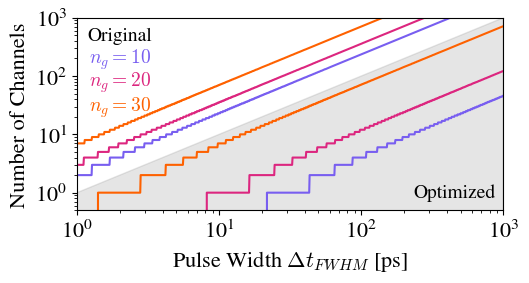

In [4]:
fig = plt.figure(figsize=(5.5,2.5))

fwhm = lambda x: (1550**2*0.441/c/x)*1e-6
xsmin,xsmax = 10**0,10**3
bwsmin,bwsmax = 10**-1,10**2.5
xs = np.logspace(np.log10(xsmin),np.log10(xsmax),1000)
bws = np.logspace(np.log10(bwsmin),np.log10(bwsmax),1000)
 
BwOpts = np.array([25,38,75])
BwOgs = np.array([0.49,1.3,7.6])
colors = [cs['p'],cs['m'],cs['o']]

for i in range(3):
    ys1 = np.floor(BwOpts[i]/1e9/3/fwhm(xs))
    ys2 = np.floor(BwOgs[i]/1e9/3/fwhm(xs))
    plt.plot(xs, ys1, color=colors[i])
    plt.plot(xs, ys2, color=colors[i])
    
# Just draw a diagonal line to indicate the physical boundary (no shading)
plt.fill_between([xsmin, xsmax], [xsmin, xsmax], color='gray', zorder=0,alpha=0.2)

#add text
plt.text(2,500,r'Original',color='k',ha='center',va='center',fontsize=14)
plt.text(450,1,r'Optimized',color='k',ha='center',va='center',fontsize=14)

#add Ng labels 
plt.text(2,200,r'$n_g=10$',color=colors[0],ha='center',va='center',fontsize=14)
plt.text(2,80,r'$n_g=20$',color=colors[1],ha='center',va='center',fontsize=14)
plt.text(2,30,r'$n_g=30$',color=colors[2],ha='center',va='center',fontsize=14)

plt.ylim(0.5,1000)
plt.xlim(xsmin,xsmax)
plt.yscale('log')
plt.xscale('log')

plt.xlabel(r"Pulse Width $\Delta t_{FWHM}$ [ps]")
plt.ylabel("Number of Channels")

In [2]:
dlambda = lambda x,ng: 1550*x/ng
xs = np.linspace(0,1,1000)
print(dlambda(.5,10),dlambda(.5,20),dlambda(.5,30))

NameError: name 'np' is not defined

<a list of 6 text.Text objects>

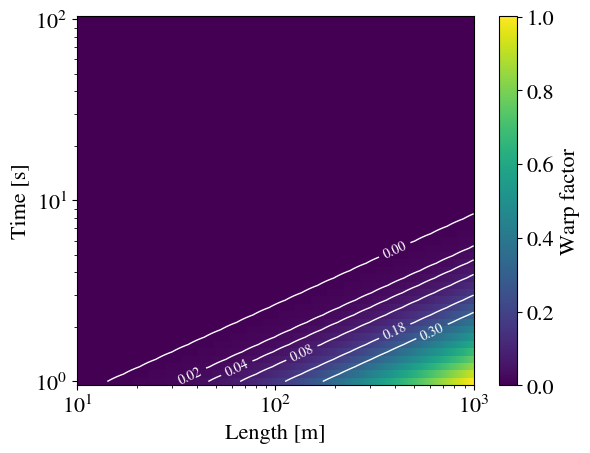

In [240]:
beta = 1e4
z = np.logspace(1,3,1000)
t = np.logspace(0,2)
Z,T = np.meshgrid(z,t)
warp = np.log10(np.sqrt(1+(beta*Z*1e-6/T**2)**2))

plt.pcolormesh(Z,T,warp,cmap='viridis')
plt.colorbar(label='Warp factor')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Length [m]')
plt.ylabel('Time [s]')

# Add isobars (contour lines) at specific warp factor values
isobar_values = np.log10([1.01,1.05,1.1,1.2,1.5,2]) # <-- set your desired values here
contour = plt.contour(Z, T, warp, levels=isobar_values, colors='white', linewidths=1)
plt.clabel(contour, fmt="%.2f", fontsize=10, colors='white')


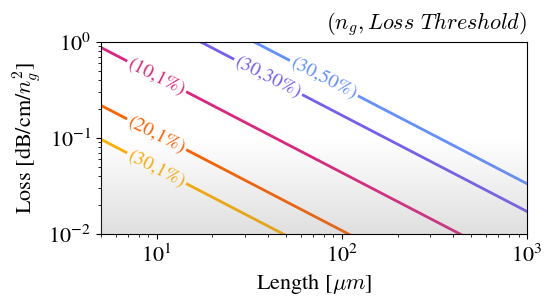

In [93]:
fig = plt.figure(figsize=(5.5,2.5))

# percent threshold and ng value 
ngs = [30,20,10,30,30]
thresholds = [0.99,0.99,0.99,.70,.50]

# Define annotation points (x positions) and labels
label_xs = [10, 10, 10, 40, 80]
label_texts = [
    r"(30,1%)",
    r"(20,1%)",
    r"(10,1%)",
    r"(30,30%)",
    r"(30,50%)"
]

# different lengths
L = np.logspace(np.log10(5),np.log10(1000),1000)

for i, (ing, it, color) in enumerate(zip(ngs, thresholds, list(cs.values()))):
    y = -10*np.log10(it)/(L*1e-4)/ing**2
    plt.plot(L, y, color=color, linewidth=2)
    
    # Get annotation position for this curve
    x_annot = label_xs[i]
    idx = (np.abs(L - x_annot)).argmin()
    y_annot = y[idx]
    
    plt.text(
        x_annot, y_annot,
        label_texts[i],
        color=color,
        fontsize=14,
        ha='center', va='center',
        rotation=-27,
        bbox=dict(facecolor='white', edgecolor='none', pad=1.7, alpha=1)
    )

# Faded horizontal shaded region: y in [10,1e3]
ymin, ymax = 1e-1, 1e-2
nsteps = 200
ys = np.logspace(np.log10(ymin), np.log10(ymax), nsteps)
for i in range(nsteps - 1):
    alpha = 0.00 + 0.25 * (i / (nsteps - 1))  # Fades in as y increases
    plt.fill_between([plt.xlim()[0], plt.xlim()[1]], ys[i], ys[i+1], 
                     color='gray', alpha=alpha, edgecolor=None,zorder=10)

# add axis labels 
plt.ylabel(r'Loss [dB/cm/$n_g^2$]')
plt.xlabel(r'Length [$\mu m$]')

# add main reference label
plt.text(1000,1.1,r'$\left(n_g, Loss\ Threshold\right)$',color='k',va='bottom',ha='right')
plt.yscale('log')
plt.xscale('log')
plt.xlim(5,1000)
plt.ylim(1e-2,1)
plt.show()

## Simulate the PCWs

In [5]:
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..', '..')))
import optomization as opt
import legume
import json 

In [95]:
ks = np.linspace(np.pi*.5,np.pi,200)
gmax = 4.001
gmeParams = {'verbose':True,'numeig':30,'compute_im':False,'gmode_inds':[0,2,4],'kpoints':np.vstack([ks,[0]*len(ks)])}

#load a json file 
with open('/Users/dominic/Desktop/optGME/paper2/FullRun/media/ng20/ndbp3/loss_tests5/test6/meta_data.json', 'r') as f:
    opt_data = json.load(f)

with open('/Users/dominic/Desktop/optGME/paper2/FullRun/media/ng30/ndbp1/loss_tests0/test7/meta_data.json', 'r') as f:
    opt_data2 = json.load(f)

#get crystals
phcOG = opt.W1(NyChange=0,Ny=7)
phcOpt = opt.W1(vars=np.array(opt_data['vars']),Ny=7)
phcOpt2 = opt.W1(vars=np.array(opt_data2['vars']),Ny=7)

#get gme results 
gmeOG = legume.GuidedModeExp(phcOG,gmax=gmax)
gmeOpt = legume.GuidedModeExp(phcOpt,gmax=gmax)
gmeOpt2 = legume.GuidedModeExp(phcOpt2,gmax=gmax)
gmeOG.run(**gmeParams)
gmeOpt.run(**gmeParams)
gmeOpt2.run(**gmeParams)






┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 589 plane waves and 3 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'        │ 37.377   │ │--------------------│    4% │
│ Inverse matrix of Fourier-space permittivity               │ 0.041    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver            │ 745.355  │ │████████████████----│   85% │
│ Creating GME matrix                                        │ 94.337   │ │██------------------│   11% │
├────────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 200 k-points   │ 877.556  │ │████████████████████│  100% │
└────────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 589 plane waves and 3 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'        │ 40.006   │ │--------------------│    5% │
│ Inverse matrix of Fourier-space permittivity               │ 0.047    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver            │ 701.581  │ │████████████████----│   84% │
│ Creating GME matrix                                        │ 91.495   │ │██------------------│   11% │
├────────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 200 k-points   │ 833.550  │ │████████████████████│  100% │
└────────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Steps in GuidedModeExp: 589 plane waves and 3 guided modes ┃ Time (s) ┃                 % vs total T ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Guided modes computation with gmode_compute='exact'        │ 39.699   │ │--------------------│    3% │
│ Inverse matrix of Fourier-space permittivity               │ 0.069    │ │--------------------│    0% │
│ Matrix diagionalization using the 'eigh' solver            │ 1056.157 │ │█████████████████---│   88% │
│ Creating GME matrix                                        │ 109.852  │ │█-------------------│    9% │
├────────────────────────────────────────────────────────────┼──────────┼──────────────────────────────┤
│ Total time for real part of frequencies for 200 k-points   │ 1206.601 │ │████████████████████│  100% │
└────────────────────────────────────────────────────────────┴──────────┴──────────────────────────────┘

Skipping imaginary part computation, use run_im() to run it, or compute_rad() to compute the radiative rates of 
selected eigenmodes

In [96]:
aOG = 401
aOpt = 427
aOpt2 = 393

backscatterParamsOG = {'a': aOG,'sig':3,'lp':40,'phidiv':45,'zdiv':10}
backscatterParamsOpt = {'a':aOpt,'sig':3,'lp':40,'phidiv':45,'zdiv':10}
backscatterParamsOpt2 = {'a':aOpt2,'sig':3,'lp':40,'phidiv':45,'zdiv':10}

ngOpt2 = []
ngOpt = []
ngOG = []
lossOpt = []
lossOG = []
lossOpt2 = []
for i in range(200):
    ngOpt.append(opt.NG(gmeOpt,i,14))
    ngOG.append(opt.NG(gmeOG,i,14))
    ngOpt2.append(opt.NG(gmeOpt2,i,14))
    lossOpt.append(opt.backscatterLog(gmeOpt,phcOpt,14,k=i,**backscatterParamsOpt))
    lossOG.append(opt.backscatterLog(gmeOG,phcOG,14,k=i,**backscatterParamsOG))
    lossOpt2.append(opt.backscatterLog(gmeOpt2,phcOpt2,14,k=i,**backscatterParamsOpt2))
ngOG = np.array(ngOG)
ngOpt = np.array(ngOpt)
ngOpt2 = np.array(ngOpt2)
lossOpt = np.array(lossOpt)
lossOG = np.array(lossOG)
lossOpt2 = np.array(lossOpt2)


In [9]:
def calc_dispersion(gme, ng, band=14, a=455):
    fs_hz = gme.freqs[:, band] * 299792458 / a / 1e-9
    disp = (
        1 / (2 * np.pi * 299792458)
        * (np.array(np.abs(ng[1:])) - np.array(np.abs(ng[:-1])))
        / (fs_hz[1:] - fs_hz[:-1])
        * 1e24
    )
    return disp


freqsOG = gmeOG.freqs[:,14]* 299792458 / aOG / 1e-9
freqsOpt = gmeOpt.freqs[:,14]* 299792458 / aOpt / 1e-9
freqsOpt2 = gmeOpt2.freqs[:,14]* 299792458 / aOpt2 / 1e-9

dispOG = calc_dispersion(gmeOG, ngOG, band=14, a=aOG)
dispOpt = calc_dispersion(gmeOpt, ngOpt, band=14, a=aOpt)
dispOpt2 = calc_dispersion(gmeOpt2, ngOpt2, band=14, a=aOpt2)

startIOpt,endIOpt = 69,182
startIOpt2,endIOpt2 = 88,152
startIOG,endIOG = 120,123


In [6]:
import pickle

# Load the saved data from GMEdata.pkl
with open('GMEdata.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

# Unpack the data
gmeOG, gmeOpt, gmeOpt2 = loaded_dict['gmes']
phcOG, phcOpt, phcOpt2 = loaded_dict['phcs']
gmeParams = loaded_dict['gmeParams']
ks = loaded_dict['ks']
gmax = loaded_dict['gmax']
ngOG, ngOpt, ngOpt2 = loaded_dict['ngs']
aOG, aOpt, aOpt2 = loaded_dict['as']
dispOG, dispOpt, dispOpt2 = loaded_dict['disps']
lossOG, lossOpt, lossOpt2 = loaded_dict['losses']
freqsOG, freqsOpt, freqsOpt2 = loaded_dict['freqs']

(3.0, 100.0)

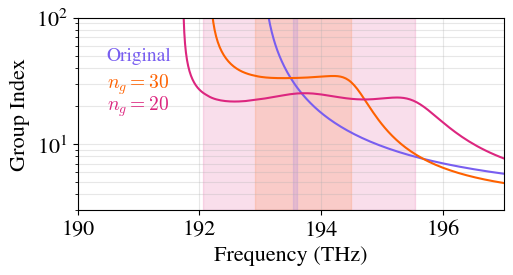

In [10]:
#ng plot 
fig = plt.figure(figsize=(5.5,2.5))
plt.plot(freqsOG*1e-12,np.abs(ngOG), color=cs['p'])
plt.plot(freqsOpt2*1e-12,np.abs(ngOpt2), color=cs['o'])
plt.plot(freqsOpt*1e-12,np.abs(ngOpt), color=cs['m'])

plt.axvspan(freqsOpt[startIOpt]*1e-12, freqsOpt[endIOpt]*1e-12, color=cs['m'], alpha=0.15)
plt.axvspan(freqsOpt2[startIOpt2]*1e-12, freqsOpt2[endIOpt2]*1e-12, color=cs['o'], alpha=0.15)
plt.axvspan(freqsOG[startIOG]*1e-12, freqsOG[endIOG]*1e-12, color=cs['p'], alpha=0.15)
plt.xlim(190,197)


plt.text(191,50,'Original',color=cs['p'],ha='center',va='center',fontsize=14)
plt.text(191,30,r'$n_g=30$',color=cs['o'],ha='center',va='center',fontsize=14)
plt.text(191,20,r'$n_g=20$',color=cs['m'],ha='center',va='center',fontsize=14)


plt.ylabel('Group Index')
plt.xlabel('Frequency (THz)')
plt.yscale('log')
plt.grid(True, which='both', alpha=0.3)
plt.ylim(3,100)

plt.ylim()

(10.0, 1000000.0)

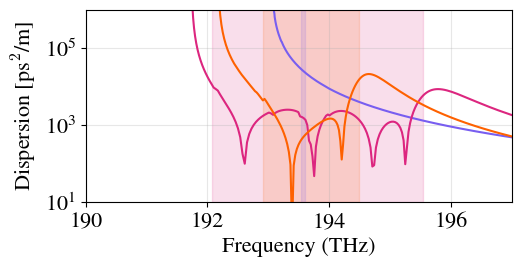

In [11]:
fig = plt.figure(figsize=(5.5,2.5))
plt.plot(freqsOG[:-1]*1e-12,np.abs(dispOG), color=cs['p'])
plt.plot(freqsOpt[:-1]*1e-12,np.abs(dispOpt), color=cs['m'])
plt.plot(freqsOpt2[:-1]*1e-12,np.abs(dispOpt2), color=cs['o'])

plt.axvspan(freqsOpt[startIOpt]*1e-12, freqsOpt[endIOpt]*1e-12, color=cs['m'], alpha=0.15)
plt.axvspan(freqsOpt2[startIOpt2]*1e-12, freqsOpt2[endIOpt2]*1e-12, color=cs['o'], alpha=0.15)
plt.axvspan(freqsOG[startIOG]*1e-12, freqsOG[endIOG]*1e-12, color=cs['p'], alpha=0.15)
plt.xlim(190,197)
plt.ylabel(r'Dispersion [ps$^2$/m]')
plt.xlabel('Frequency (THz)')
plt.yscale('log')
plt.grid(True, which='both', alpha=0.3)
plt.ylim(1e1,1e6)

(0.01, 1)

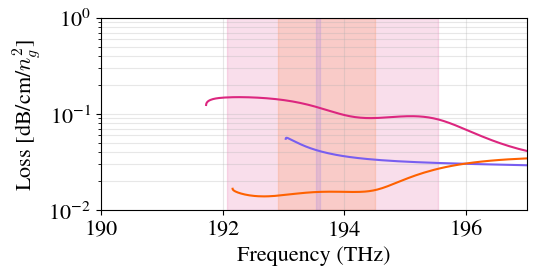

In [12]:
fig = plt.figure(figsize=(5.5,2.5))
plt.plot(freqsOG*1e-12,10**lossOG/455/1E-7*10*np.log10(np.e), color=cs['p'])
plt.plot(freqsOpt*1e-12,10**lossOpt/455/1E-7*10*np.log10(np.e), color=cs['m'])
plt.plot(freqsOpt2*1e-12,10**lossOpt2/455/1E-7*10*np.log10(np.e), color=cs['o'])

plt.axvspan(freqsOpt[startIOpt]*1e-12, freqsOpt[endIOpt]*1e-12, color=cs['m'], alpha=0.15)
plt.axvspan(freqsOpt2[startIOpt2]*1e-12, freqsOpt2[endIOpt2]*1e-12, color=cs['o'], alpha=0.15)
plt.axvspan(freqsOG[startIOG]*1e-12, freqsOG[endIOG]*1e-12, color=cs['p'], alpha=0.15)
plt.xlim(190,197)

plt.ylabel(r'Loss [dB/cm/$n_g^2$]')
plt.xlabel('Frequency (THz)')
plt.yscale('log')
plt.grid(True, which='both', alpha=0.3)
plt.ylim(1e-2,1)

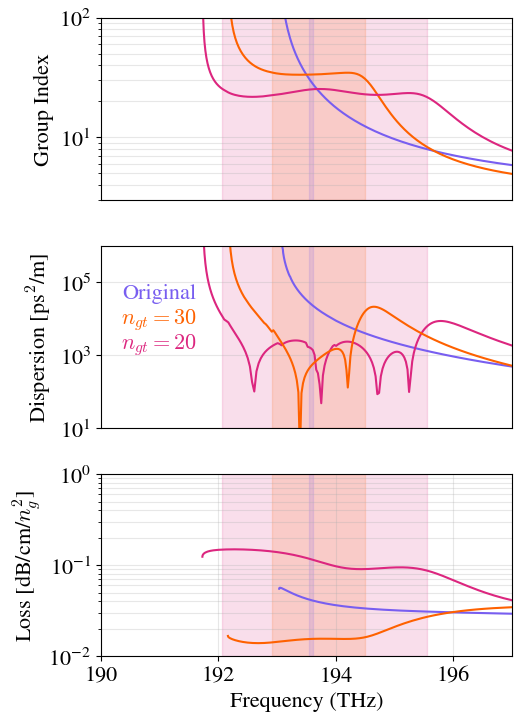

In [13]:
# Combine the three plots above so that they share an x axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5.5, 7.5))

# Top plot: Group Index
ax1.plot(freqsOG*1e-12, np.abs(ngOG), color=cs['p'])
ax1.plot(freqsOpt2*1e-12, np.abs(ngOpt2), color=cs['o'])
ax1.plot(freqsOpt*1e-12, np.abs(ngOpt), color=cs['m'])

ax1.axvspan(freqsOpt[startIOpt]*1e-12, freqsOpt[endIOpt]*1e-12, color=cs['m'], alpha=0.15)
ax1.axvspan(freqsOpt2[startIOpt2]*1e-12, freqsOpt2[endIOpt2]*1e-12, color=cs['o'], alpha=0.15)
ax1.axvspan(freqsOG[startIOG]*1e-12, freqsOG[endIOG]*1e-12, color=cs['p'], alpha=0.15)

ax1.set_ylabel('Group Index')
ax1.set_yscale('log')
ax1.grid(True, which='both', alpha=0.3)
ax1.set_ylim(3, 100)
ax1.set_xlim(190, 197)
ax1.set_xticks([])

# Middle plot: Dispersion
ax2.plot(freqsOG[:-1]*1e-12, np.abs(dispOG), color=cs['p'])
ax2.plot(freqsOpt[:-1]*1e-12, np.abs(dispOpt), color=cs['m'])
ax2.plot(freqsOpt2[:-1]*1e-12, np.abs(dispOpt2), color=cs['o'])

ax2.text(191, 5e4, 'Original', color=cs['p'], ha='center', va='center', fontsize=16)
ax2.text(191, 1e4, r'$n_{gt}=30$', color=cs['o'], ha='center', va='center', fontsize=16)
ax2.text(191, 2e3, r'$n_{gt}=20$', color=cs['m'], ha='center', va='center', fontsize=16)

ax2.axvspan(freqsOpt[startIOpt]*1e-12, freqsOpt[endIOpt]*1e-12, color=cs['m'], alpha=0.15)
ax2.axvspan(freqsOpt2[startIOpt2]*1e-12, freqsOpt2[endIOpt2]*1e-12, color=cs['o'], alpha=0.15)
ax2.axvspan(freqsOG[startIOG]*1e-12, freqsOG[endIOG]*1e-12, color=cs['p'], alpha=0.15)

ax2.set_ylabel(r'Dispersion [ps$^2$/m]')
ax2.set_yscale('log')
ax2.grid(True, which='both', alpha=0.3)
ax2.set_xlim(190, 197)
ax2.set_ylim(1e1, 1e6)
ax2.set_xticks([])

# Bottom plot: Loss
ax3.plot(freqsOG*1e-12, 10**lossOG/455/1E-7*10*np.log10(np.e), color=cs['p'])
ax3.plot(freqsOpt*1e-12, 10**lossOpt/455/1E-7*10*np.log10(np.e), color=cs['m'])
ax3.plot(freqsOpt2*1e-12, 10**lossOpt2/455/1E-7*10*np.log10(np.e), color=cs['o'])

ax3.axvspan(freqsOpt[startIOpt]*1e-12, freqsOpt[endIOpt]*1e-12, color=cs['m'], alpha=0.15)
ax3.axvspan(freqsOpt2[startIOpt2]*1e-12, freqsOpt2[endIOpt2]*1e-12, color=cs['o'], alpha=0.15)
ax3.axvspan(freqsOG[startIOG]*1e-12, freqsOG[endIOG]*1e-12, color=cs['p'], alpha=0.15)

ax3.set_ylabel(r'Loss [dB/cm/$n_g^2$]')
ax3.set_xlabel('Frequency (THz)')
ax3.set_yscale('log')
ax3.grid(True, which='both', alpha=0.3)
ax3.set_ylim(1e-2, 1)
ax3.set_xlim(190, 197)

plt.tight_layout()
plt.show()

In [213]:
def plot_field(ax, gme, phc, ylim, mode=14, kpoint=130, transpose=False, vmax=0.4,vmin=0):
    """
    Plots the field intensity for a given mode and k-point.

    Parameters:
        ax: matplotlib axis to plot on
        gme: guided mode expansion object
        phc: photonic crystal object
        ylim: y-axis range (or x-axis if transposed)
        mode: mode index to plot
        kpoint: k-point index to plot
        transpose: if True, transpose the entire plot (switch x and y directions)
    """

    ys = np.linspace(-ylim / 2, ylim / 2, 300)
    fields, _, _ = gme.get_field_xy('E', kpoint, mode, phc.layers[0].d/2, ygrid=ys, component='xyz')
    eabs = np.abs(
        np.conj(fields['x'])*fields['x'] +
        np.conj(fields['y'])*fields['y'] +
        np.conj(fields['z'])*fields['z']
    )

    print(np.max(eabs))
    if transpose:
        # Swap the axes for transposed plotting
        img = eabs
        # Note: imshow expects (ny, nx), so we transpose for display
        cax1 = ax.imshow(
            img,
            extent=[-.5, .5, -ylim/2, ylim/2],
            cmap='plasma',
            aspect='auto',
            origin='lower',
            vmax=vmax,
            vmin=vmin
        )
        # Add circles for inclusions, switching x and y placement
        for s in gme.phc.layers[0].shapes:
            circle = Circle((s.x_cent, s.y_cent), s.r, edgecolor='white', facecolor='none', linewidth=2)
            surround = Circle((0, 0), s.r, edgecolor='white', facecolor='none', linewidth=2)
            ax.add_patch(circle)
            surround.center = (circle.center[0] - np.sign(circle.center[0]), circle.center[1])
            ax.add_patch(surround)
        ax.set_xlim(-0.5, 0.5)
        ax.set_ylim(-ylim/2, ylim/2)
    else:
        # Normal (not transposed)
        cax1 = ax.imshow(
            eabs.T,
            extent=[-ylim/2, ylim/2, -.5, .5],
            cmap='plasma',
            aspect='auto',
            origin='lower',
            vmax=vmax,
            vmin=vmin
        )
        # Add circles for inclusions, switching x and y
        for s in gme.phc.layers[0].shapes:
            circle = Circle((s.y_cent, s.x_cent), s.r, edgecolor='white', facecolor='none', linewidth=2)
            surround = Circle((0, 0), s.r, edgecolor='white', facecolor='none', linewidth=2)
            ax.add_patch(circle)
            surround.center = (circle.center[0], circle.center[1] - np.sign(circle.center[1]))
            ax.add_patch(surround)
        ax.set_xlim(-ylim/2, ylim/2)
        ax.set_ylim(-0.5, 0.5)

    ax.tick_params(
        axis='both', which='both',
        bottom=False, top=False, left=False, right=False,
        labelbottom=False, labelleft=False
    )
    return ax

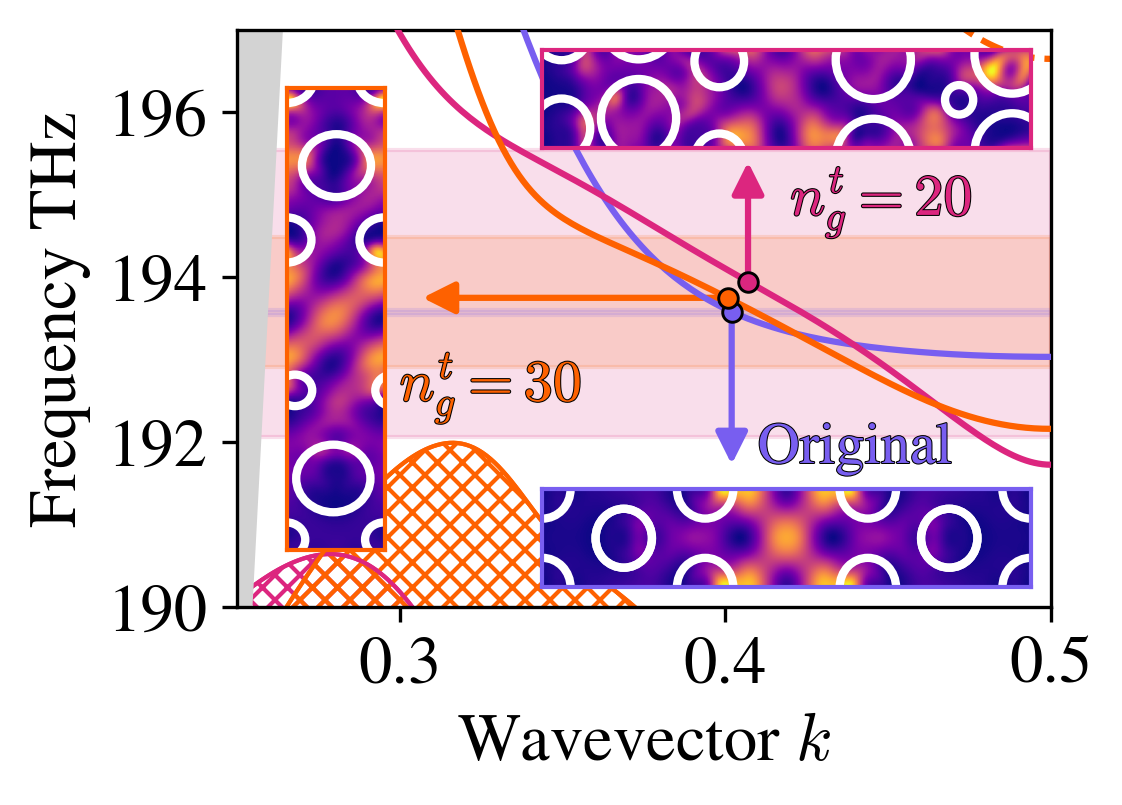

In [66]:
# Add a text scale hyperparameter at the top of this plotting block
text_scale = 1.2  # Set this to >1.0 for larger text, <1.0 for smaller, e.g. 1.2, 0.8, etc.

fig, ax = plt.subplots(figsize=(3.5,2.5),dpi=300)
ks = np.linspace(.5*np.pi,np.pi,200)/np.pi/2

# Main band diagram (on main axes)
ax.plot(ks, gmeOG.freqs[:, 14]* 299792458 / aOG / 1e-9 * 1e-12, color=cs['p'],zorder=5)
ax.plot(ks, gmeOpt.freqs[:, 14]* 299792458 / aOpt / 1e-9 * 1e-12, color=cs['m'],zorder=5)
ax.plot(ks, gmeOpt2.freqs[:, 14]* 299792458 / aOpt2 / 1e-9 * 1e-12, color=cs['o'],zorder=5)

#other bands in the band gap
ax.plot(ks, gmeOG.freqs[:, 15]* 299792458 / aOG / 1e-9 * 1e-12,'--', color=cs['p'])
ax.plot(ks, gmeOpt.freqs[:, 15]* 299792458 / aOpt / 1e-9 * 1e-12,'--', color=cs['m'])
ax.plot(ks, gmeOpt2.freqs[:, 15]* 299792458 / aOpt2 / 1e-9 * 1e-12,'--', color=cs['o'])



def add_bandgap_crosshatch(ax, ks, ylow, yhigh, color, hatch='xx', zorder=1):
    # Crosshatch: use 'xx' for dense both-directions slashes. Increase density with more x's.
    verts = list(zip(ks, ylow)) + list(zip(ks[::-1], yhigh[::-1]))
    patch = mpatches.Polygon(
        verts, closed=True, 
        edgecolor=color, facecolor='none',
        hatch=hatch, lw=1, zorder=zorder, alpha=1)
    ax.add_patch(patch)
    ax.plot(ks, ylow, color=color, lw=1, zorder=zorder+1)
    ax.plot(ks, yhigh, color=color, lw=1, zorder=zorder+1)

# Use a denser and both-directions diagonal hatch, e.g. hatch='xxxx'
crosshatch = 'xxxx'

# Lower band gap crosshatching
add_bandgap_crosshatch(
    ax, ks, 
    np.zeros(len(ks)), 
    gmeOG.freqs[:, 13]*299792458/aOG/1e-9*1e-12, 
    color=cs['p'], hatch=crosshatch
)
add_bandgap_crosshatch(
    ax, ks, 
    np.zeros(len(ks)), 
    gmeOpt.freqs[:, 13]*299792458/aOpt/1e-9*1e-12, 
    color=cs['m'], hatch=crosshatch
)
add_bandgap_crosshatch(
    ax, ks, 
    np.zeros(len(ks)), 
    gmeOpt2.freqs[:, 13]*299792458/aOpt2/1e-9*1e-12, 
    color=cs['o'], hatch=crosshatch
)

# Upper band gap crosshatching
top_const = np.ones(len(ks))*299792458/aOG/1e-9*1e-12
add_bandgap_crosshatch(
    ax, ks, 
    gmeOG.freqs[:, 16]*299792458/aOG/1e-9*1e-12, 
    top_const, 
    color=cs['p'], hatch=crosshatch
)
add_bandgap_crosshatch(
    ax, ks, 
    gmeOpt.freqs[:, 16]*299792458/aOpt/1e-9*1e-12, 
    top_const, 
    color=cs['m'], hatch=crosshatch
)
add_bandgap_crosshatch(
    ax, ks, 
    gmeOpt2.freqs[:, 16]*299792458/aOpt2/1e-9*1e-12, 
    top_const, 
    color=cs['o'], hatch=crosshatch
)
# Light line
ax.fill_between(ks, ks* 299792458 / aOG / 1e-9 * 1e-12, np.ones(len(ks))* 299792458 / aOG / 1e-9 * 1e-12, color='lightgray', alpha=1,zorder=2)

#show the bandwidths 
ax.axhspan(freqsOpt[startIOpt]*1e-12, freqsOpt[endIOpt]*1e-12, color=cs['m'], alpha=0.15)
ax.axhspan(freqsOpt2[startIOpt2]*1e-12, freqsOpt2[endIOpt2]*1e-12, color=cs['o'], alpha=0.15)
ax.axhspan(freqsOG[startIOG]*1e-12, freqsOG[endIOG]*1e-12, color=cs['p'], alpha=0.15)

# Make the tick label numbers larger (use text_scale)
ax.tick_params(axis='both', labelsize=int(14 * text_scale))

#limits and labels
ax.set_xlim(0.25,0.5)
ax.set_ylim(190,197)
ax.set_xlabel(r'Wavevector $k$', fontsize=int(14 * text_scale))
ax.set_ylabel(r'Frequency THz', fontsize=int(14 * text_scale))

# ----- Add inset axes -----
kOG = (endIOG+startIOG)//2; kOpt = (endIOpt+startIOpt)//2; kOpt2 = (endIOpt2+startIOpt2)//2
# First inset (top) -- show zoom of top band edge
axins_top = inset_axes(ax, width="60%", height="17%", loc='lower right', borderpad=0.3)
axins_top = plot_field(axins_top, gmeOG, gmeOG.phc, 6 * np.sqrt(3)/2, mode=14, kpoint=kOpt)
axins_top.set_xticks([]);axins_top.set_yticks([])
for spine in axins_top.spines.values():
    spine.set_edgecolor(cs['p'])
    spine.set_linewidth(1)

# Second inset (bottom) -- show zoom of bottom band edge
axins_bot = inset_axes(ax, width="60%", height="17%", loc='upper right', borderpad=0.3)
axins_bot = plot_field(axins_bot, gmeOpt, gmeOpt.phc, 6 * np.sqrt(3)/2, mode=14, kpoint=kOG)
axins_bot.set_xticks([]);axins_bot.set_yticks([])
for spine in axins_bot.spines.values():
    spine.set_edgecolor(cs['m'])
    spine.set_linewidth(1)

# Third inset (left) -- show zoom of bottom band edge
axins_bot = inset_axes(ax, width="12%", height="80%", loc='center left', borderpad=0.75)
axins_bot = plot_field(axins_bot, gmeOpt2, gmeOpt2.phc, 6 * np.sqrt(3)/2, mode=14, kpoint=kOpt2,transpose=True)
axins_bot.set_xticks([]);axins_bot.set_yticks([])
for spine in axins_bot.spines.values():
    spine.set_edgecolor(cs['o'])
    spine.set_linewidth(1)

# Add points and vertical dashed arrows
# --- Draw three short, compressed arrows and scatter points ---
arrow_specs = [
    # x, y, dx, dy, color
    (ks[kOG],   gmeOG.freqs[kOG, 14]   * 299792458 / aOG   / 1e-9 * 1e-12,   0,    -1.9, cs['p']),
    (ks[kOpt],  gmeOpt.freqs[kOpt, 14] * 299792458 / aOpt  / 1e-9 * 1e-12,   0,     1.5, cs['m']),
    (ks[kOpt2], gmeOpt2.freqs[kOpt2,14]* 299792458 / aOpt2 / 1e-9 * 1e-12,  -0.095, 0,    cs['o']),
]
for x, y, dx, dy, c in arrow_specs:
    ax.scatter(x, y, color=c, edgecolor='black', linewidth=0.7, s=22, zorder=6)
    ax.annotate(
        '', xy=(x+dx, y+dy), xytext=(x, y),
        arrowprops=dict(arrowstyle="-|>", color=c, lw=1.5, shrinkA=1, shrinkB=1), zorder=4
    )
# Now you can adjust 'main_height' and 'base_length' per-arrow above!

#add text labels
# Add label for "Original"
t_orig = ax.text(
    0.41, 191.75, "Original",
    fontsize=14,
    color=cs['p']
)
t_orig.set_path_effects([
    pe.Stroke(linewidth=0.5, foreground="black"),
    pe.Normal()
])

# Add label for "Optimized" below
t_opt = ax.text(
    0.3, 192.5, r"$n_g^t=30$",
    fontsize=14,
    color=cs['o']
)
t_opt.set_path_effects([
    pe.Stroke(linewidth=0.5, foreground="black"), 
    pe.Normal()
])

# Add label for "Optimized" below
t_opt = ax.text(
    0.42, 194.75, r"$n_g^t=20$",
    fontsize=14,
    color=cs['m']
)
t_opt.set_path_effects([
    pe.Stroke(linewidth=0.5, foreground="black"), 
    pe.Normal()
])

plt.show()

In [558]:
in_band = (np.abs(np.abs(ngOG) - 30) < 2)
true_indices = np.where(in_band)[0]
print(true_indices[0], true_indices[-1])

120 123


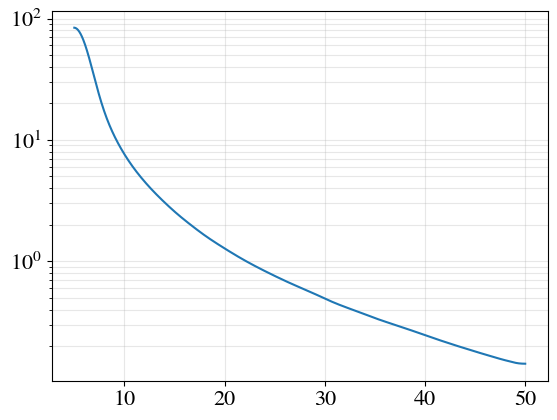

In [579]:
def get_dl(ng):
    in_band = (np.abs(np.abs(ngOG) - ng) < 2)
    true_indices = np.where(in_band)[0]
    if len(true_indices) == 0:
        return(0)
    s,e = true_indices[0], true_indices[-1]
    df = (freqsOG[s]-freqsOG[e])*1e-9
    return(df*1550**2/299792458)

ngValues = np.linspace(5,50,1000)
dlValues = []
for n in ngValues:
    dlValues.append(get_dl(n))

from scipy.ndimage import gaussian_filter1d
dlValues = gaussian_filter1d(np.array(dlValues), sigma=20)
plt.plot(ngValues,dlValues)
plt.yscale('log')
plt.grid(True, which='both', alpha=0.3)
plt.show()



In [580]:
# Find the indices of ngValues closest to 10, 20, and 30
target_ngs = [10, 20, 30]
closest_indices = [np.abs(ngValues - t).argmin() for t in target_ngs]
closest_dl_values = [dlValues[i] for i in closest_indices]
for t, v in zip(target_ngs, closest_dl_values):
    print(f"ng ≈ {t}: dl ≈ {v}")

ng ≈ 10: dl ≈ 7.617751034837469
ng ≈ 20: dl ≈ 1.2750942202754296
ng ≈ 30: dl ≈ 0.4924210869514149


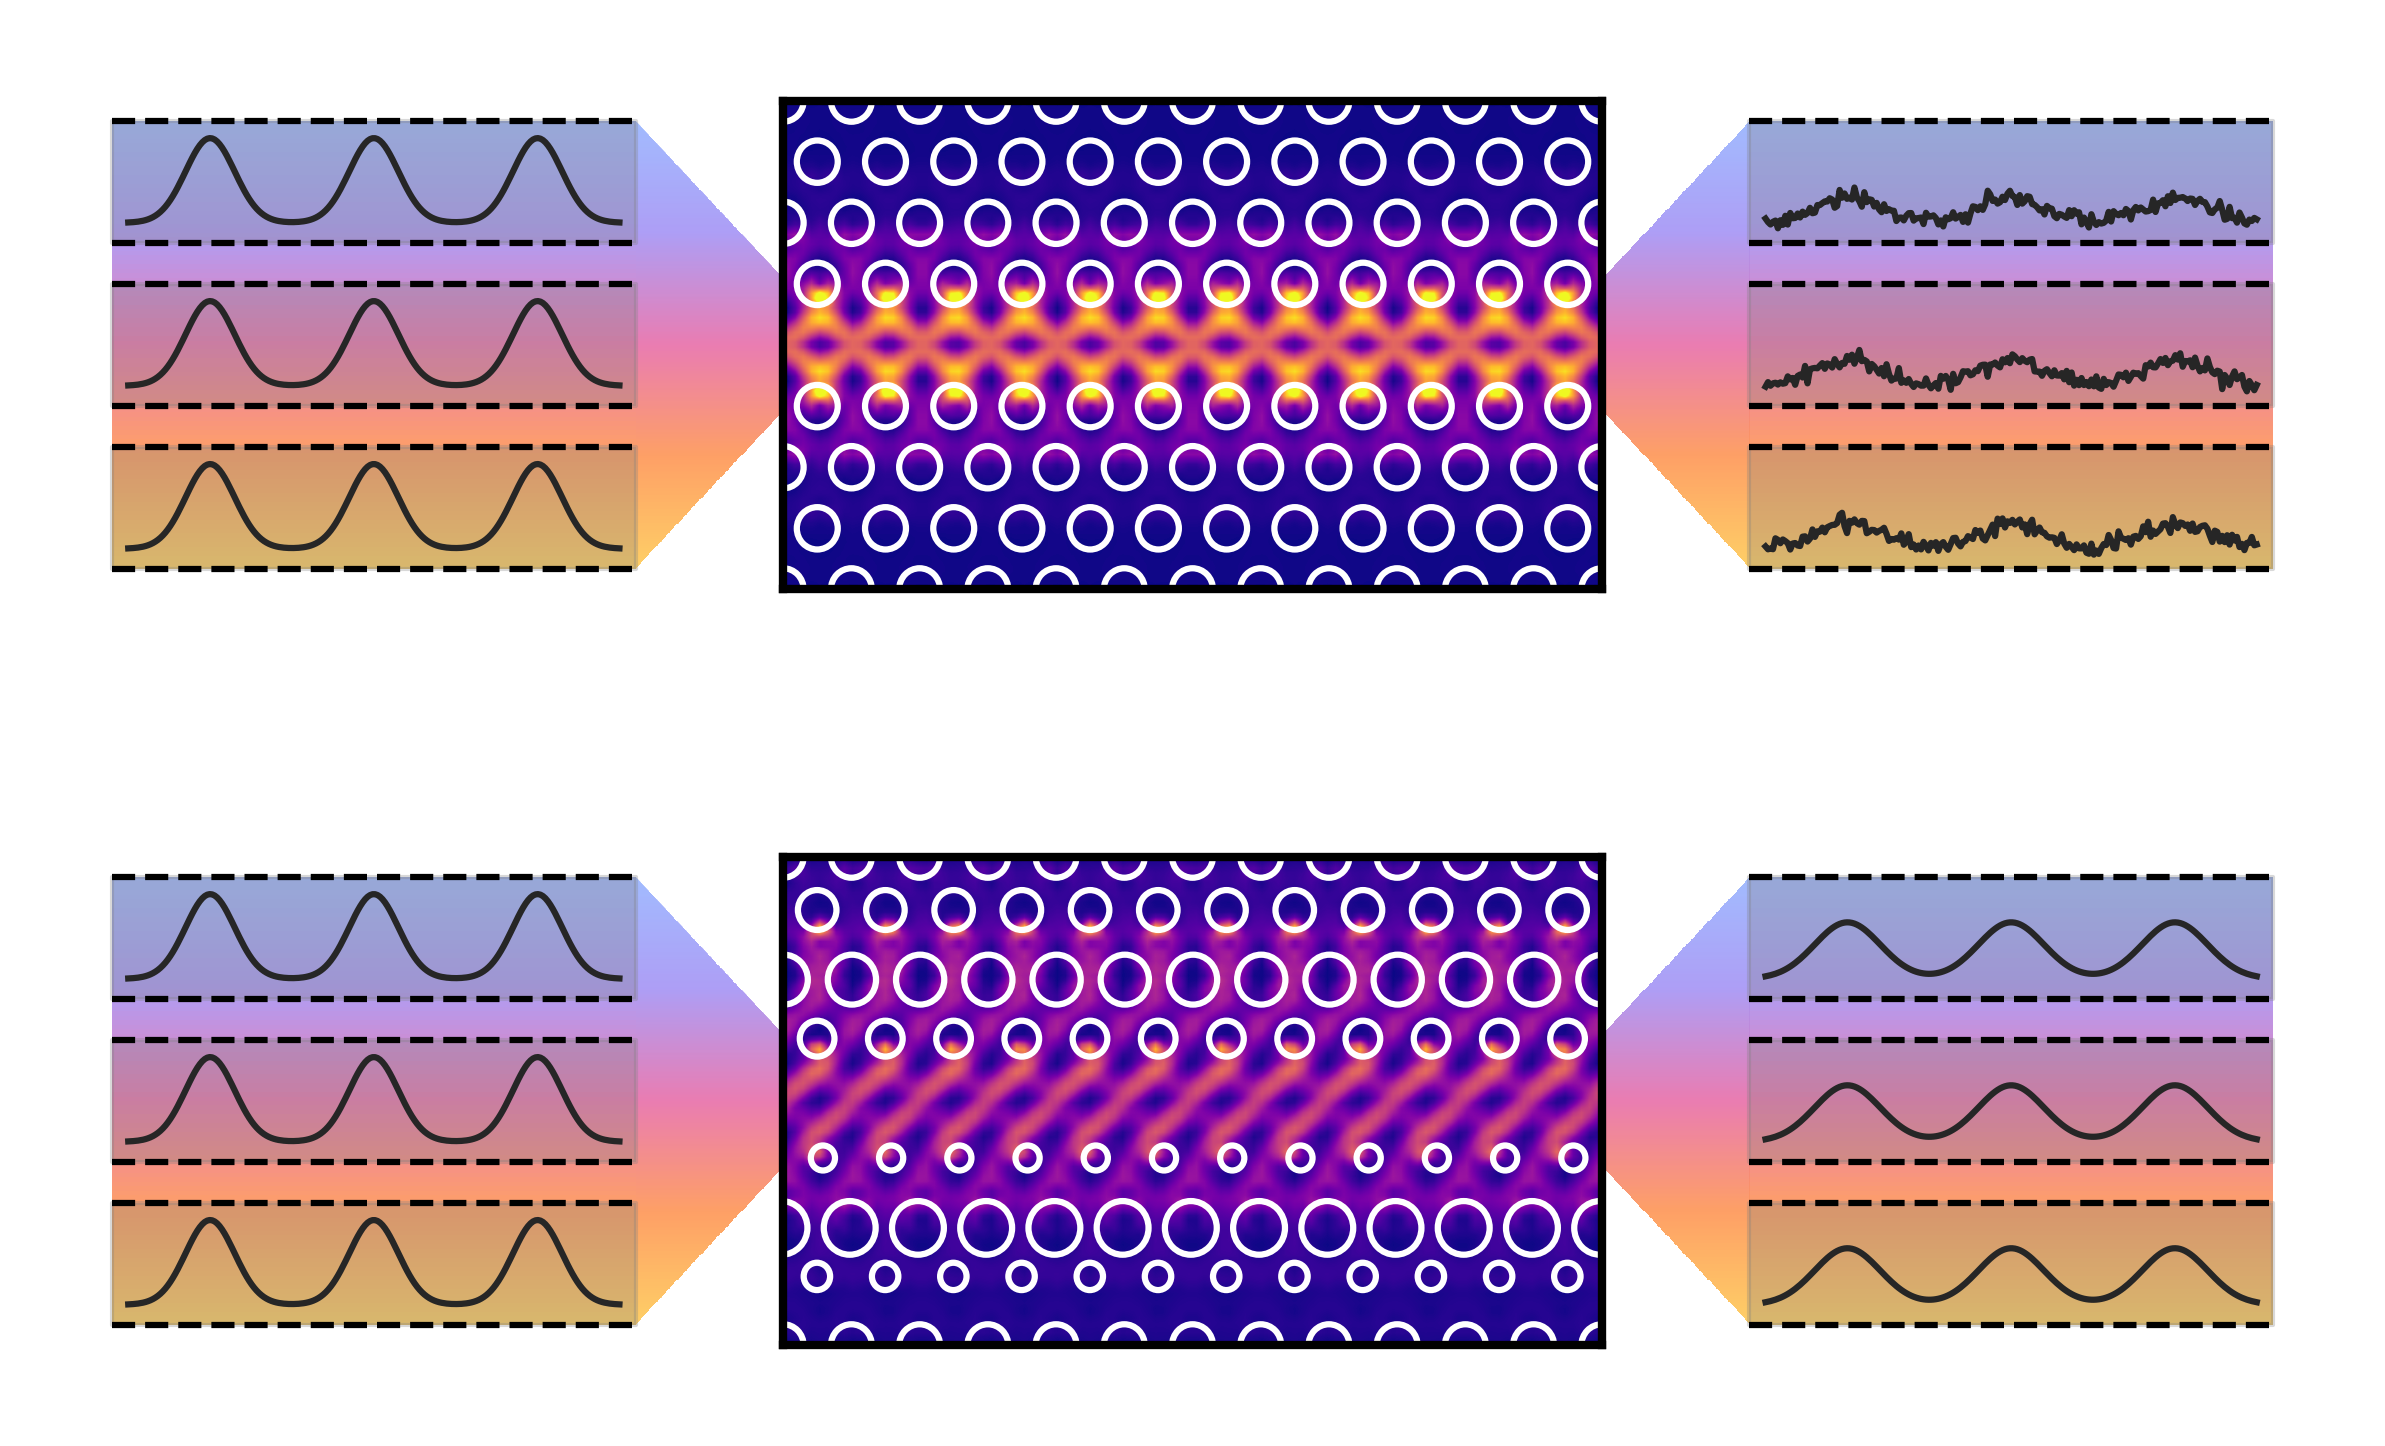

In [85]:
# Diagram parameters
from scipy.ndimage import gaussian_filter
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from matplotlib.patches import Rectangle, Circle

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6),dpi=300)

# Layout parameters
container_width = 5
container_height = np.sqrt(3)/2*4
waveOffset = 1
container_x = 2.5
n_signals = 3
signal_spacing = container_height/3
channel_width = 0.75*container_height/3
container_y_bottom = 0
wave_length = 3
channel_buffer = 0.1
input_x = container_x - waveOffset - wave_length
output_x = container_x + container_width + waveOffset
x_wave = np.linspace(0, wave_length, 200)

# Heatmap parameters - customize these to set xy coordinates and data
phc_y_lim = 4*np.sqrt(3)/2
phc_x_lim = 6
heatmap_resolution = 100
heatmap_x_coords = np.linspace(-phc_x_lim, phc_x_lim, heatmap_resolution)  # x coordinates for heatmap
heatmap_y_coords = np.linspace(-phc_y_lim, phc_y_lim, heatmap_resolution)  # y coordinates for heatmap
mode_data,_,_ = gmeOG.get_field_xy('E',121,14,z=gmeOG.phc.layers[0].d/2,xgrid=heatmap_x_coords,ygrid=heatmap_y_coords)
mode_data2,_,_ = gmeOpt2.get_field_xy('E',121,14,z=gmeOpt2.phc.layers[0].d/2,xgrid=heatmap_x_coords,ygrid=heatmap_y_coords)

#get the list of patches for the heatmap
patches = []
for hole in gmeOG.phc.layers[0].shapes:
    for ix in np.arange(-phc_x_lim,phc_x_lim+1):
        patches.append(Circle((hole.x_cent+ix,hole.y_cent),hole.r,fill=False,color='white',linewidth=1.5))
patches2 = []
for hole in gmeOpt2.phc.layers[0].shapes:
    for ix in np.arange(-phc_x_lim,phc_x_lim+1):
        patches2.append(Circle((hole.x_cent+ix,hole.y_cent),hole.r,fill=False,color='white',linewidth=1.5))

# Wave pattern parameters - customize these to change the signal shapes
input_wave_params = {
    'n_peaks': 3,
    'amplitude': 0.6,
    'spread': 0.15,
    'phase_shift': lambda i: i * 0.1,
    'noise_level': 0
}

output_wave_params_top = {
    'n_peaks': 3,
    'amplitude': 0.18,
    'spread': 0.2,
    'phase_shift': lambda i: i * 0.1,
    'noise_level': 0.03
}

output_wave_params_bottom = {
    'n_peaks': 3,
    'amplitude': 0.4,
    'spread': 0.2,
    'phase_shift': lambda i: i * 0.1,
    'noise_level': 0
}

# Wave generation function
def generate_wave(x, params):
    """Generate wave pattern based on parameters"""
    wave = np.zeros_like(x)
    for i in range(params['n_peaks']):
        center = 0.5 + i * wave_length/params['n_peaks']
        gaussian = params['amplitude'] * np.exp(-((x - center) ** 2) / (2 * params['spread'] ** 2))
        wave += gaussian
    if params['noise_level'] > 0:
        wave += params['noise_level'] * np.random.normal(0, 1, len(x))
    return wave

# Channel drawing function
def draw_channel(ax, x_start, x_end, y_center, width, color='gray', alpha=0.3):
    """Draw a channel using only top/bottom dashed lines and semi-transparent shading inside"""

    # Get bottom and top y coordinates
    y_bottom = y_center
    y_top = y_center + width

    # Draw dashed top and bottom lines
    ax.plot([x_start, x_end], [y_bottom, y_bottom], linestyle='--', color='k', linewidth=1.5, alpha=1, zorder=4)
    ax.plot([x_start, x_end], [y_top, y_top], linestyle='--', color='k', linewidth=1.5, alpha=1, zorder=4)

    # Draw shading between top and bottom lines using fill_between
    ax.fill_between(
        [x_start, x_end],
        [y_top, y_top],
        [y_bottom, y_bottom],
        color=color,
        alpha=alpha,
        zorder=3
    )

# Function to draw rainbow trapezoid
def draw_rainbow_trapezoid(ax, x_start, x_end, y_top_start, y_bottom_start, y_top_end, y_bottom_end, n_steps=500):
    """Draw a trapezoid with rainbow gradient shading using imshow for artifact-free rendering"""
    
    # Calculate trapezoid dimensions
    y_range_start = y_top_start - y_bottom_start
    y_range_end = y_top_end - y_bottom_end
    
    # Create bounding box for the trapezoid (slightly larger to ensure full coverage)
    x_min = min(x_start, x_end)
    x_max = max(x_start, x_end)
    y_min = min(y_bottom_start, y_bottom_end)
    y_max = max(y_top_start, y_top_end)
    
    # Create a high-resolution grid
    ny = n_steps
    nx = max(50, int(ny * abs(x_end - x_start) / max(abs(y_range_start), abs(y_range_end))))
    
    # Create coordinate arrays
    y_coords = np.linspace(y_min, y_max, ny)
    x_coords = np.linspace(x_min, x_max, nx)
    Y, X = np.meshgrid(y_coords, x_coords, indexing='ij')
    
    # Create gradient data (vertical gradient from top to bottom)
    gradient = np.linspace(1, 0, ny).reshape(-1, 1)  # 1 at top (red), 0 at bottom (violet)
    gradient = np.tile(gradient, (1, nx))
    
    # Create mask for trapezoid shape using vectorized operations
    # Trapezoid has vertical sides at x_start and x_end
    # Top edge: (x_start, y_top_start) to (x_end, y_top_end)
    # Bottom edge: (x_start, y_bottom_start) to (x_end, y_bottom_end)
    
    # Check if x is within vertical boundaries
    x_in_bounds = (X >= min(x_start, x_end)) & (X <= max(x_start, x_end))
    
    # Calculate y boundaries at each x using linear interpolation
    if abs(x_end - x_start) > 1e-10:
        t_x = (X - x_start) / (x_end - x_start)
        y_top_at_x = y_top_start + t_x * (y_top_end - y_top_start)
        y_bottom_at_x = y_bottom_start + t_x * (y_bottom_end - y_bottom_start)
    else:
        y_top_at_x = np.full_like(X, min(y_top_start, y_top_end))
        y_bottom_at_x = np.full_like(X, max(y_bottom_start, y_bottom_end))
    
    # Check if y is within the trapezoid at each x
    y_min_at_x = np.minimum(y_top_at_x, y_bottom_at_x)
    y_max_at_x = np.maximum(y_top_at_x, y_bottom_at_x)
    y_in_bounds = (Y >= y_min_at_x) & (Y <= y_max_at_x)
    
    # Combine masks
    mask = x_in_bounds & y_in_bounds
    
    # Apply mask
    gradient[~mask] = np.nan
    
    # Use imshow for smooth rendering
    extent = [x_min, x_max, y_min, y_max]
    im = ax.imshow(gradient, cmap=cmap_cont, extent=extent, aspect='auto', 
                   origin='lower', alpha=0.6, zorder=2, interpolation='bilinear')
    
    # Clip to trapezoid shape using a path patch
    trapezoid_path = Path([
        [x_start, y_bottom_start],
        [x_start, y_top_start],
        [x_end, y_top_end],
        [x_end, y_bottom_end],
        [x_start, y_bottom_start]
    ])
    
    # Create clipping path
    clip_patch = PathPatch(trapezoid_path, transform=ax.transData)
    im.set_clip_path(clip_patch)

# Function to draw rainbow rectangle backdrop
def draw_rainbow_rectangle(ax, x_left, x_right, y_bottom, y_top, n_steps=100):
    """Draw a rectangle with rainbow gradient shading from top to bottom"""
    
    # Draw rectangle with gradient by creating many horizontal strips
    height = y_top - y_bottom
    width = x_right - x_left
    
    for i in range(n_steps):
        t = i / n_steps
        t_next = (i + 1) / n_steps
        
        # Calculate y positions for this strip
        y_bottom_strip = y_bottom + t * height
        y_top_strip = y_bottom + t_next * height
        strip_height = y_top_strip - y_bottom_strip
        
        # Get color from colormap (rainbow from top to bottom)
        # Map position to color: top (t=0) gets red, bottom (t=1) gets violet
        color = cmap_cont(1 - t)
        
        rect = Rectangle((x_left, y_bottom_strip), width, strip_height,
                        facecolor=color, edgecolor='none', alpha=0.6, zorder=1.5)
        ax.add_patch(rect)

# Draw diagram function
def draw_diagram(ax, input_params, output_params, heatmap_data=None, heatmap_patches=None):
    """Draw a single diagram with given wave parameters
    
    Parameters:
    -----------
    ax : matplotlib axes
        The axes to draw on
    input_params : dict
        Parameters for input wave generation
    output_params : dict
        Parameters for output wave generation
    heatmap_data : numpy array, optional
        Custom heatmap data (shape: (ny, nx)). If None, uses noise map
    heatmap_patches : list, optional
        List of matplotlib patches to add to the heatmap
    """
    # Set axes limits first (needed for coordinate transformation)
    # Calculate approximate bounds based on diagram elements
    x_min = input_x - channel_buffer - 0.5
    x_max = output_x + wave_length + channel_buffer + 0.5
    y_min = container_y_bottom - 0.5
    y_max = container_y_bottom + container_height + 0.5
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.axis('off')
    
    # Calculate channel positions
    channel_y_positions = []
    for i in range(n_signals):
        y_pos = container_y_bottom + 0.125*signal_spacing + i * signal_spacing
        channel_y_positions.append(y_pos)
    
    # Calculate top and bottom of channel region
    top_channel_top = channel_y_positions[-1] + channel_width
    bottom_channel_bottom = channel_y_positions[0]
    channel_region_height = top_channel_top - bottom_channel_bottom
    
    # Compression parameters for trapezoid
    compression_ratio = 0.3  # Box opening is 30% of channel region height
    box_opening_height = channel_region_height * compression_ratio
    box_opening_center = container_y_bottom + container_height / 2
    
    # Create inset axes for heatmap (replacing the rectangle)
    # Use matplotlib's transform system to get exact bounds matching the rectangle
    fig = ax.figure
    
    # Define rectangle corners in data coordinates
    x0_data, y0_data = container_x, container_y_bottom
    x1_data, y1_data = container_x + container_width, container_y_bottom + container_height
    
    # Transform data coordinates to normalized axes coordinates (0-1)
    trans_data_to_axes = ax.transData + ax.transAxes.inverted()
    bottom_left_axes = trans_data_to_axes.transform([x0_data, y0_data])
    top_right_axes = trans_data_to_axes.transform([x1_data, y1_data])
    
    # Compute the inset axes position with respect to the parent axes bbox (in figure coordinates)
    ax_bbox = ax.get_position()  # bbox in figure coordinates

    # Get data-to-axes transformation (data coords -> [0,1] axes coords)
    trans_data_to_axes = ax.transData + ax.transAxes.inverted()
    bottom_left_axes = trans_data_to_axes.transform([x0_data, y0_data])
    top_right_axes = trans_data_to_axes.transform([x1_data, y1_data])

    # Calculate position of inset axes in figure coordinates, but relative to the parent axes
    # The bbox of ax is [ax_bbox.x0, ax_bbox.y0, ax_bbox.width, ax_bbox.height] in figure coords
    x0_fig = ax_bbox.x0 + bottom_left_axes[0] * ax_bbox.width
    y0_fig = ax_bbox.y0 + bottom_left_axes[1] * ax_bbox.height
    width_fig = (top_right_axes[0] - bottom_left_axes[0]) * ax_bbox.width
    height_fig = (top_right_axes[1] - bottom_left_axes[1]) * ax_bbox.height

    # Now add the axes at these figure-relative coordinates
    ax_inset = fig.add_axes([x0_fig, y0_fig, width_fig, height_fig])
    
    # Generate noise map if no data provided
    if heatmap_data is None:
        np.random.seed(42)  # For reproducibility
        heatmap_data = np.random.randn(heatmap_resolution, heatmap_resolution)
        # Smooth the noise a bit
        heatmap_data = gaussian_filter(heatmap_data, sigma=2)
    
    # Create heatmap
    im = ax_inset.imshow(heatmap_data, 
                         extent=[heatmap_x_coords[0], heatmap_x_coords[-1], 
                                heatmap_y_coords[0], heatmap_y_coords[-1]],
                         cmap='plasma',
                         aspect='auto',
                         origin='lower',
                         interpolation='bilinear',
                         vmin=0,
                         vmax=0.3)
    
    # Add patches if provided
    if heatmap_patches is not None:
        for patch in heatmap_patches:
            ax_inset.add_patch(patch)
    
    # Style the inset axes
    ax_inset.set_xlim(heatmap_x_coords[0], heatmap_x_coords[-1])
    ax_inset.set_ylim(heatmap_y_coords[0], heatmap_y_coords[-1])
    ax_inset.set_xticks([])
    ax_inset.set_yticks([])
    ax_inset.spines['top'].set_visible(True)
    ax_inset.spines['bottom'].set_visible(True)
    ax_inset.spines['left'].set_visible(True)
    ax_inset.spines['right'].set_visible(True)
    ax_inset.spines['top'].set_color('black')
    ax_inset.spines['bottom'].set_color('black')
    ax_inset.spines['left'].set_color('black')
    ax_inset.spines['right'].set_color('black')
    ax_inset.spines['top'].set_linewidth(2)
    ax_inset.spines['bottom'].set_linewidth(2)
    ax_inset.spines['left'].set_linewidth(2)
    ax_inset.spines['right'].set_linewidth(2)
    
    # Draw rainbow trapezoid from channels to box (input side) - behind channels
    draw_rainbow_trapezoid(ax, 
                          input_x + wave_length + channel_buffer,
                          container_x,
                          top_channel_top,
                          bottom_channel_bottom,
                          box_opening_center + box_opening_height/2,
                          box_opening_center - box_opening_height/2)
    
    # Draw rainbow trapezoid from box to channels (output side) - behind channels
    draw_rainbow_trapezoid(ax,
                          container_x + container_width,
                          output_x - channel_buffer,
                          box_opening_center + box_opening_height/2,
                          box_opening_center - box_opening_height/2,
                          top_channel_top,
                          bottom_channel_bottom)
    
    # Draw rainbow backdrop rectangles behind channels
    # Input channel backdrop
    draw_rainbow_rectangle(ax,
                          input_x - channel_buffer,
                          input_x + wave_length + channel_buffer,
                          bottom_channel_bottom,
                          top_channel_top)
    
    # Output channel backdrop
    draw_rainbow_rectangle(ax,
                          output_x - channel_buffer,
                          output_x + wave_length + channel_buffer,
                          bottom_channel_bottom,
                          top_channel_top)
    
    # Draw channels (on top of rainbow backdrops and trapezoids)
    for i in range(n_signals):
        y_pos = channel_y_positions[i]
        draw_channel(ax, input_x-channel_buffer, input_x+wave_length+channel_buffer, y_pos, channel_width)
        draw_channel(ax, output_x-channel_buffer, output_x+wave_length+channel_buffer, y_pos, channel_width)
    
    # Draw input signals
    for i in range(n_signals):
        y_pos = 1.5 + i * channel_width/3
        y_pos = container_y_bottom + 0.25*signal_spacing + i * signal_spacing
        phase = input_params['phase_shift'](i) if callable(input_params['phase_shift']) else input_params['phase_shift']
        params = input_params.copy()
        params['phase_shift'] = phase
        wave = generate_wave(x_wave, params)
        ax.plot(input_x + x_wave, y_pos + wave, 'k-', linewidth=1.5)
    
    # Draw output signals
    for i in range(n_signals):
        y_pos = 1.5 + i * signal_spacing
        y_pos = container_y_bottom + 0.25*signal_spacing + i * signal_spacing
        phase = output_params['phase_shift'](i) if callable(output_params['phase_shift']) else output_params['phase_shift']
        params = output_params.copy()
        params['phase_shift'] = phase
        wave = generate_wave(x_wave, params)
        ax.plot(output_x + x_wave, y_pos + wave, 'k-', linewidth=1.5)

# Draw top diagram
draw_diagram(ax1, input_wave_params, output_wave_params_top,heatmap_patches=patches,heatmap_data=(np.abs(mode_data['x'])+np.abs(mode_data['y']))**2)

# Draw bottom diagram
draw_diagram(ax2, input_wave_params, output_wave_params_bottom,heatmap_patches=patches2,heatmap_data=(np.abs(mode_data2['x'])+np.abs(mode_data2['y']))**2)

# Example: To use custom heatmap data and add patches:
# from matplotlib.patches import Circle, Rectangle
# custom_data = np.random.rand(100, 100)  # Your custom data
# patches = [Circle((0.5, 0.5), 0.2, fill=False, edgecolor='red', linewidth=2)]
# draw_diagram(ax1, input_wave_params, output_wave_params_top, 
#              heatmap_data=custom_data, heatmap_patches=patches)

plt.show()

# Nir's bad Diagram V2

In [ ]:
#Nir' bad diagram


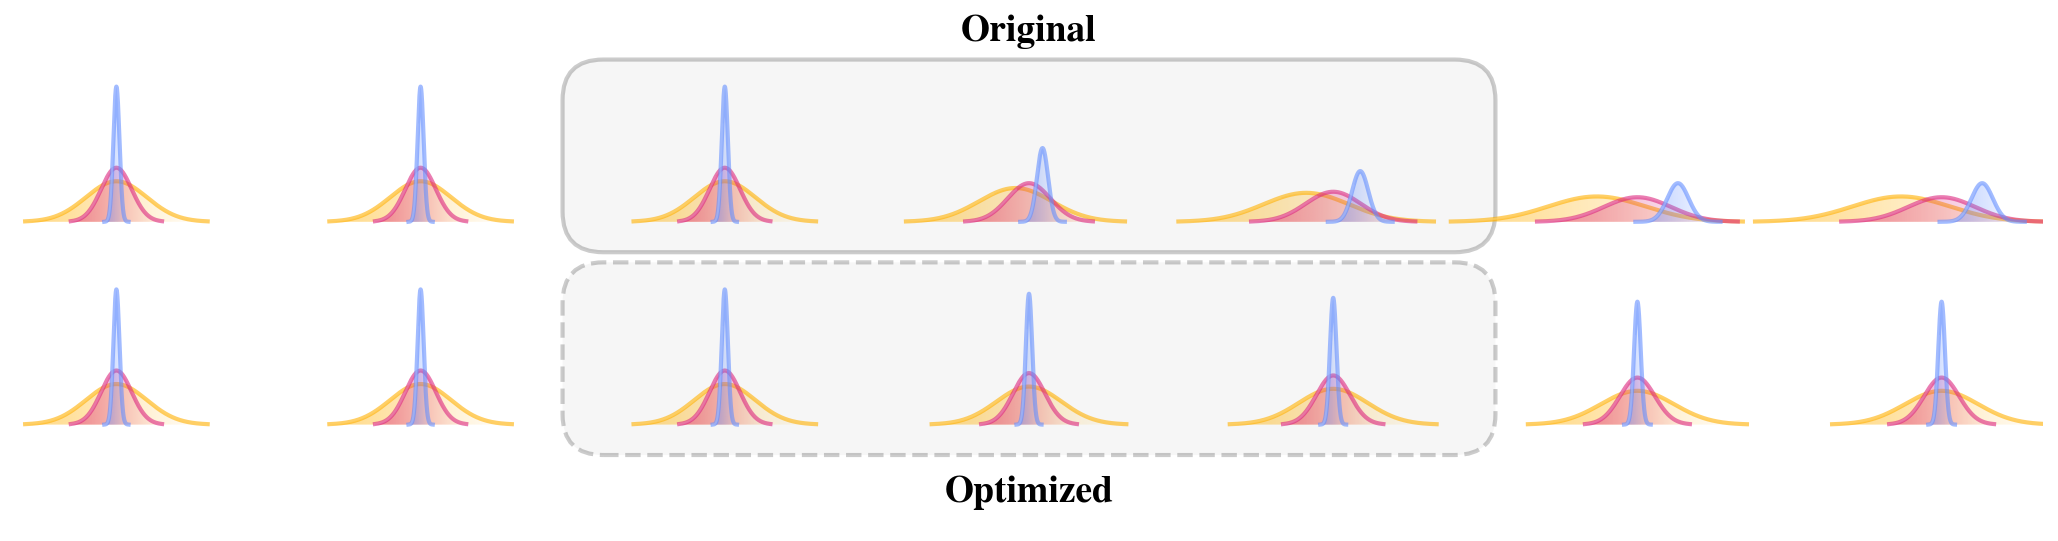

In [268]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap

# ============================================================================
# PARAMETERS - Adjust these to control how each Gaussian changes as it propagates
# ============================================================================

# Number of instances: 2 before, 3 during, 2 after crystal
n_before = 2
n_during = 3
n_after = 2
n_instances = n_before + n_during + n_after

# Horizontal spacing between instances
x_spacing = 1.5

# Crystal boundaries (instance indices)
crystal_start_idx = n_before
crystal_end_idx = n_before + n_during

# Baseline y-position for top and bottom rows
baseline_y_top = 1
baseline_y_bottom = 0.0

# Parameters for each of the 3 Gaussians
# Each Gaussian has: amplitude, width (sigma), and how these change
# Area is kept constant: amplitude * width = constant
# So amplitude = area / width

# Define initial areas (constant for each Gaussian)
initial_areas = [0.01, 0.02, 0.03]  # amplitude * width

gaussian_params_top = [
    {
        'name': 'Gaussian 1',
        'color': cs['b'],  # Blue
        'area': initial_areas[0],  # Constant area
        'width': 0.015,
        'center_offset': 0,
        # Evolution parameters (how values change with propagation)
        'width_evolution': lambda i: 0.015 * (1 + i * 2.5),  # Broadens significantly
        'center_evolution': lambda i: i * 0.2,  # Shifts slightly
        'zorder':6,
        'width_extent': 4.0
    },
    {
        'name': 'Gaussian 2',
        'color': cs['m'],  # Magenta
        'area': initial_areas[1],
        'width': 0.075,
        'center_offset': 0,
        'width_evolution': lambda i: 0.075 * (1 + i * 1.2),  # Broadens more
        'center_evolution': lambda i: 0,  # No shift
        'zorder':4,
        'width_extent': 3.0
    },
    {
        'name': 'Gaussian 3',
        'color': cs['y'],  # Yellow
        'area': initial_areas[2],
        'width': 0.15,
        'center_offset': 0,
        'width_evolution': lambda i: 0.15 * (1 + i * 0.6),  # Broadens most
        'center_evolution': lambda i: i * -0.2,  # Shifts most
        'zorder':2,
        'width_extent': 3.0
    },
]

gaussian_params_bottom = [
    {
        'name': 'Gaussian 1',
        'color': cs['b'],  # Blue
        'area': initial_areas[0],
        'width': 0.015,
        'center_offset': 0,
        'width_evolution': lambda i: 0.015 * (1 + i * 0.1),  # Minimal broadening
        'center_evolution': lambda i: 0,  # No shift
        'zorder':6,
        'width_extent': 4.0
    },
    {
        'name': 'Gaussian 2',
        'color': cs['m'],  # magenta
        'area': initial_areas[1],
        'width': 0.075,
        'center_offset': 0,
        'width_evolution': lambda i: 0.075 * (1 + i * 0.15),  # Slight broadening
        'center_evolution': lambda i: 0,  # No shift
        'zorder':4,
        'width_extent': 3.0
    },
    {
        'name': 'Gaussian 3',
        'color': cs['y'],  # yellow
        'area': initial_areas[2],
        'width': 0.15,
        'center_offset': 0,
        'width_evolution': lambda i: 0.15 * (1 + i * 0.2),  # Moderate broadening
        'center_evolution': lambda i: 0,  # No shift
        'zorder':2,
        'width_extent': 3.0
    },
]

# Horizontal range for drawing each Gaussian instance
x_range_extent = 0.6  # How far to extend on each side of center
n_points = 500  # Number of points for smooth curves

# ============================================================================
# HELPER FUNCTIONS
# ============================================================================

def draw_gaussian_with_gradient(ax, x_center, y_center, amplitude, width, color,
                                area, zorder, width_extent=3.0, n_gradient_steps=50,
                                next_gaussian=None):
    """
    Draw a Gaussian with smooth gradient shading from left to right using imshow.
    """
    from matplotlib.patches import PathPatch
    from matplotlib.path import Path
    from matplotlib.colors import to_rgb
    
    # Default full range
    x_min = x_center - width_extent * width
    x_max = x_center + width_extent * width

    # Generate x values over the full range
    x_values = np.linspace(x_min, x_max, n_points)

    # Calculate Gaussian values
    y_gaussian = amplitude * np.exp(-((x_values - x_center)**2) / (2 * width**2))
    
    # Calculate y range
    y_min = y_center
    y_max = y_center + np.max(y_gaussian)
    
    # Create a high-resolution grid for smooth gradient
    nx = 300  # Number of horizontal points
    ny = 150  # Number of vertical points
    
    # Create coordinate arrays
    x_coords = np.linspace(x_min, x_max, nx)
    y_coords = np.linspace(y_min, y_max, ny)
    X, Y = np.meshgrid(x_coords, y_coords)
    
    # Calculate Gaussian values for each x in the grid
    y_gaussian_grid = amplitude * np.exp(-((x_coords - x_center)**2) / (2 * width**2))
    
    # Create alpha gradient from left to right
    # Normalize x position from 0 (left) to 1 (right)
    x_normalized = (X - x_min) / (x_max - x_min)  # 0 to 1 for each point
    # Gradient from left (darker, alpha=0.3) to right (lighter, alpha=0.05)
    alpha_gradient = 0.0 + 0.5 * (1-x_normalized)
    
    # Create mask: only show pixels below the Gaussian curve
    y_gaussian_at_x = np.interp(x_coords, x_values, y_gaussian)
    mask = Y <= (y_center + np.tile(y_gaussian_at_x, (ny, 1)))
    
    # Apply mask to alpha
    alpha_gradient[~mask] = 0
    
    # Convert color to RGB
    rgb_color = to_rgb(color)
    
    # Create RGBA image with gradient alpha
    rgba_image = np.zeros((ny, nx, 4))
    rgba_image[:, :, 0] = rgb_color[0]  # R
    rgba_image[:, :, 1] = rgb_color[1]  # G
    rgba_image[:, :, 2] = rgb_color[2]  # B
    rgba_image[:, :, 3] = alpha_gradient  # A
    
    # Use imshow for smooth rendering
    extent = [x_min, x_max, y_min, y_max]
    im = ax.imshow(rgba_image, extent=extent, aspect='auto', 
                   origin='lower', zorder=zorder, interpolation='bilinear')
    
    # Clip to Gaussian shape using a path
    gaussian_path_verts = list(zip(x_values, y_center + y_gaussian)) + \
                          list(zip(x_values[::-1], [y_center] * len(x_values)))
    gaussian_path = Path(gaussian_path_verts, closed=True)
    clip_patch = PathPatch(gaussian_path, transform=ax.transData)
    im.set_clip_path(clip_patch)

    # Draw outline with lighter opacity
    ax.plot(x_values, y_center + y_gaussian, color=color,
            linewidth=2, zorder=zorder+1, alpha=0.6)
    
    orig_rgb = np.array(to_rgb(color))
    white_rgb = np.array([1.0, 1.0, 1.0])
    whiter_rgb = orig_rgb + 0.4 * (white_rgb - orig_rgb)
    ax.plot(x_values[:200], (y_center + y_gaussian)[:200], color=whiter_rgb, linewidth=1, zorder=zorder+1, alpha=0.6)

def draw_diagram_column(ax, x_center, baseline_y, gaussian_params, instance_idx, 
                       gaussian_y_offsets, is_top=True):
    """
    Draw all 3 Gaussians stacked on top of each other at one instance.
    
    Parameters:
    -----------
    ax : matplotlib axes
    x_center : float
        X position where all Gaussians are centered
    baseline_y : float
        Y position of the baseline for this row
    gaussian_params : list
        List of Gaussian parameter dictionaries
    instance_idx : int
        Which instance we're drawing (0 to n_instances-1)
    gaussian_y_offsets : list
        Y offsets for each Gaussian relative to baseline
    is_top : bool
        True for top row (original), False for bottom row (optimized)
    """
    # Calculate progress through propagation (0 to 1)
    if instance_idx < 2:
        t = 0
    elif instance_idx > n_instances-2:
        t = 1
    else:
        t = (instance_idx-2) / (n_instances - 4)
    
    # Draw each Gaussian
    for gauss_idx, params in enumerate(gaussian_params):
        y_center = baseline_y + gaussian_y_offsets[gauss_idx]
        
        # Calculate evolved parameters
        width = params['width_evolution'](t)
        center_offset = params['center_evolution'](t)
        
        # Calculate amplitude to keep visual area constant
        # Visual area ≈ amplitude * width (for visualization purposes)
        # So amplitude = area / width
        amplitude = params['area'] / width
        
        x_gaussian_center = x_center + center_offset
        
        # Draw Gaussian with gradient
        draw_gaussian_with_gradient(ax, x_gaussian_center, y_center, amplitude, width, 
                                  params['color'], params['area'],params['zorder'],width_extent=params['width_extent'])

# ============================================================================
# CREATE THE FIGURE
# ============================================================================

fig, ax = plt.subplots(figsize=(14, 5), dpi=150)

# Calculate x positions for each instance (horizontal layout)
instance_x_positions = []
for i in range(n_instances):
    x_pos = i * x_spacing + 0.5
    instance_x_positions.append(x_pos)

# Calculate y offsets for the 3 Gaussians within each instance
# They should be stacked on top of each other with small spacing
gaussian_vertical_spacing = 0.0
gaussian_y_offsets = [0, gaussian_vertical_spacing, 2 * gaussian_vertical_spacing]

# Draw crystal region background (horizontal)
crystal_x_start = instance_x_positions[crystal_start_idx] - 0.75
crystal_x_end = instance_x_positions[crystal_end_idx - 1] + 0.75
crystal_y_start_top = baseline_y_top - 0.1
crystal_y_end_top = baseline_y_top + max(gaussian_y_offsets) + 0.75
crystal_y_start_bottom = baseline_y_bottom - 0.1
crystal_y_end_bottom = baseline_y_bottom + max(gaussian_y_offsets) + 0.75

# Draw crystal region for top row with rounded edges
ax.add_patch(FancyBboxPatch(
    (crystal_x_start, crystal_y_start_top),
    crystal_x_end - crystal_x_start,
    crystal_y_end_top - crystal_y_start_top,
    boxstyle="round,pad=0.05,rounding_size=0.20",
    facecolor='lightgray', alpha=0.2, zorder=1, edgecolor='black', linewidth=2
))

# Draw all instances for top row (original)
for instance_idx in range(n_instances):
    x_center = instance_x_positions[instance_idx]
    draw_diagram_column(ax, x_center, baseline_y_top, gaussian_params_top, instance_idx, 
                       gaussian_y_offsets, is_top=True)

# Draw all instances for bottom row (optimized)
for instance_idx in range(n_instances):
    x_center = instance_x_positions[instance_idx]
    draw_diagram_column(ax, x_center, baseline_y_bottom, gaussian_params_bottom, instance_idx, 
                       gaussian_y_offsets, is_top=False)



ax.add_patch(FancyBboxPatch(
    (crystal_x_start, crystal_y_start_bottom),
    crystal_x_end - crystal_x_start,
    crystal_y_end_bottom - crystal_y_start_bottom,
    boxstyle="round,pad=0.05,rounding_size=0.20",
    facecolor='lightgray', alpha=0.2, zorder=1, edgecolor='black', linestyle='--', linewidth=2
))


# Add labels
ax.text(instance_x_positions[n_instances // 2], baseline_y_top + max(gaussian_y_offsets) + 0.85, 'Original', 
        color='black', fontsize=18, ha='center', va='bottom', weight='bold')
ax.text(instance_x_positions[n_instances // 2], baseline_y_bottom - 0.25, 'Optimized', 
        color='black', fontsize=18, ha='center', va='top', weight='bold')



# Set axis properties
x_buffer = 0.5
y_buffer_top = 1
y_buffer_bottom = 0.5

ax.set_xlim(instance_x_positions[0] - x_buffer, instance_x_positions[-1] + x_buffer)
ax.set_ylim(baseline_y_bottom - y_buffer_bottom, 
            baseline_y_top + max(gaussian_y_offsets) + y_buffer_top)
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()

0.2162213873068602
0.14223923136913047


/var/folders/hw/03zfk07n30vg93xfdj4v1t5w0000gp/T/ipykernel_48997/550029531.py:185: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


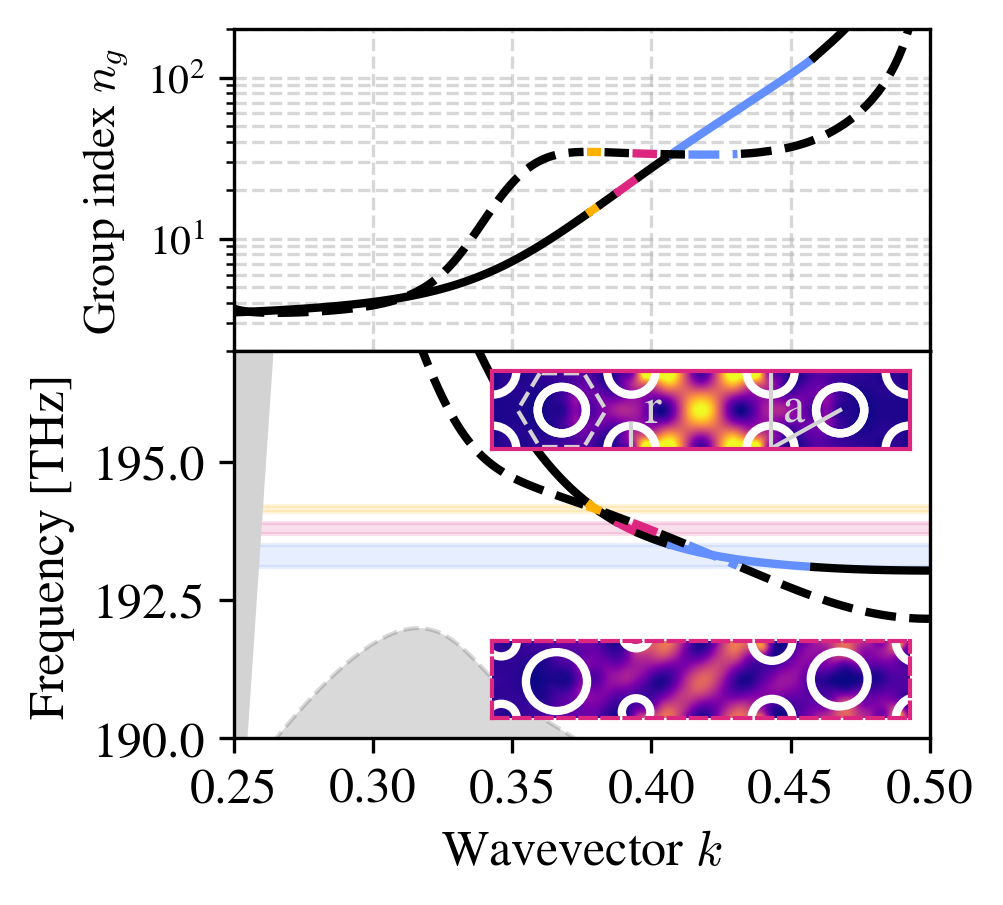

In [244]:
# Add a text scale hyperparameter at the top of this plotting block
text_scale = .9  # Set this to >1.0 for larger text, <1.0 for smaller, e.g. 1.2, 0.8, etc.

# Make figure less tall, stacked axes, shared x
fig, (ax_top, ax) = plt.subplots(
    2, 1, figsize=(3.5, 3.3),  # less tall than before (was 3.5, 2.5 for one plot)
    dpi=300, 
    sharex=True,
    gridspec_kw={'height_ratios': [1, 1.2], 'hspace': 0}
)
# ax_top is upper plot, ax is lower (main) plot

ks = np.linspace(.5*np.pi,np.pi,200)/np.pi/2

# Get both band arrays for shading to different curve bottoms
freqs14_OG = gmeOG.freqs[:, 14] * 299792458 / aOG / 1e-9 * 1e-12  # THz
freqs14_Opt2 = gmeOpt2.freqs[:, 14] * 299792458 / aOpt2 / 1e-9 * 1e-12  # THz

# show the bandwidths 
maxkS = np.argmin(np.abs(freqs14_OG-194.1))
minkS = np.argmin(np.abs(freqs14_OG-194.2))
maxkM = np.argmin(np.abs(freqs14_OG-193.7))
minkM = np.argmin(np.abs(freqs14_OG-193.9))
maxkL = np.argmin(np.abs(freqs14_OG-193.1))
minkL = np.argmin(np.abs(freqs14_OG-193.5))

# Repeat for freqs14_Opt2
maxkS_opt2 = np.argmin(np.abs(freqs14_Opt2-194.1))
minkS_opt2 = np.argmin(np.abs(freqs14_Opt2-194.2))
maxkM_opt2 = np.argmin(np.abs(freqs14_Opt2-193.7))
minkM_opt2 = np.argmin(np.abs(freqs14_Opt2-193.9))
maxkL_opt2 = np.argmin(np.abs(freqs14_Opt2-193.1))
minkL_opt2 = np.argmin(np.abs(freqs14_Opt2-193.5))

# ----------------------- TOP PLOT (example content: show gap size) -----------------------

ax_top.plot(ks[:minkS], np.abs(ngOG)[:minkS], color='black', lw=2)
ax_top.plot(ks[minkS:maxkS], np.abs(ngOG)[minkS:maxkS], color=cs['y'], lw=2)
ax_top.plot(ks[maxkS:minkM], np.abs(ngOG)[maxkS:minkM], color='black', lw=2)
ax_top.plot(ks[minkM:maxkM], np.abs(ngOG)[minkM:maxkM], color=cs['m'], lw=2)
ax_top.plot(ks[maxkM:minkL], np.abs(ngOG)[maxkM:minkL], color='black', lw=2)
ax_top.plot(ks[minkL:maxkL], np.abs(ngOG)[minkL:maxkL], color=cs['b'], lw=2)
ax_top.plot(ks[maxkL:], np.abs(ngOG)[maxkL:], color='black', lw=2)

ax_top.plot(ks[:minkS_opt2], np.abs(ngOpt2)[:minkS_opt2], color='black', linestyle='--', lw=2)
ax_top.plot(ks[minkS_opt2:maxkS_opt2], np.abs(ngOpt2)[minkS_opt2:maxkS_opt2], color=cs['y'], linestyle='--', lw=2)
ax_top.plot(ks[maxkS_opt2:minkM_opt2], np.abs(ngOpt2)[maxkS_opt2:minkM_opt2], color='black', linestyle='--', lw=2)
ax_top.plot(ks[minkM_opt2:maxkM_opt2], np.abs(ngOpt2)[minkM_opt2:maxkM_opt2], color=cs['m'], linestyle='--', lw=2)
ax_top.plot(ks[maxkM_opt2:minkL_opt2], np.abs(ngOpt2)[maxkM_opt2:minkL_opt2], color='black', linestyle='--', lw=2)
ax_top.plot(ks[minkL_opt2:maxkL_opt2], np.abs(ngOpt2)[minkL_opt2:maxkL_opt2], color=cs['b'], linestyle='--', lw=2)
ax_top.plot(ks[maxkL_opt2:], np.abs(ngOpt2)[maxkL_opt2:], color='black', linestyle='--', lw=2)

ax_top.set_ylabel(r'Group index $n_g$', fontsize=int(13*text_scale))
ax_top.tick_params(axis='both', labelsize=int(12 * text_scale))

# Remove x ticks/labels from the top plot
ax_top.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

ax_top.set_ylim(2, 200)
ax_top.grid(True, which='both', alpha=0.5, linestyle='--')
ax_top.set_yscale('log')
#ax_top.spines['bottom'].set_visible(False)

# ----------------------- BOTTOM PLOT (main band diagram essentially unchanged) -----------------------

# Main band diagram (on main axes)
ax.plot(ks[:minkS], freqs14_OG[:minkS], color='black', lw=2, zorder=5)
ax.plot(ks[minkS:maxkS], freqs14_OG[minkS:maxkS], color=cs['y'], lw=2, zorder=5)
ax.plot(ks[maxkS:minkM], freqs14_OG[maxkS:minkM], color='black', lw=2, zorder=5)
ax.plot(ks[minkM:maxkM], freqs14_OG[minkM:maxkM], color=cs['m'], lw=2, zorder=5)
ax.plot(ks[maxkM:minkL], freqs14_OG[maxkM:minkL], color='black', lw=2, zorder=5)
ax.plot(ks[minkL:maxkL], freqs14_OG[minkL:maxkL], color=cs['b'], lw=2, zorder=5)
ax.plot(ks[maxkL:], freqs14_OG[maxkL:], color='black', lw=2, zorder=5)

ax.plot(ks[:minkS_opt2], freqs14_Opt2[:minkS_opt2], color='black', linestyle='--', lw=2, zorder=5)
ax.plot(ks[minkS_opt2:maxkS_opt2], freqs14_Opt2[minkS_opt2:maxkS_opt2], color=cs['y'], linestyle='--', lw=2, zorder=5)
ax.plot(ks[maxkS_opt2:minkM_opt2], freqs14_Opt2[maxkS_opt2:minkM_opt2], color='black', linestyle='--', lw=2, zorder=5)
ax.plot(ks[minkM_opt2:maxkM_opt2], freqs14_Opt2[minkM_opt2:maxkM_opt2], color=cs['m'], linestyle='--', lw=2, zorder=5)
ax.plot(ks[maxkM_opt2:minkL_opt2], freqs14_Opt2[maxkM_opt2:minkL_opt2], color='black', linestyle='--', lw=2, zorder=5)
ax.plot(ks[minkL_opt2:maxkL_opt2], freqs14_Opt2[minkL_opt2:maxkL_opt2], color=cs['b'], linestyle='--', lw=2, zorder=5)
ax.plot(ks[maxkL_opt2:], freqs14_Opt2[maxkL_opt2:], color='black', linestyle='--', lw=2, zorder=5)

def add_bandgap_crosshatch(ax_, ks_, ylow_, yhigh_, color, hatch='xx', zorder=1):
    # Crosshatch: use 'xx' for dense both-directions slashes. Increase density with more x's.
    verts = list(zip(ks_, ylow_)) + list(zip(ks_[::-1], yhigh_[::-1]))
    patch = mpatches.Polygon(
        verts, closed=True, 
        edgecolor=color, facecolor='none',
        hatch=hatch, lw=1, zorder=zorder, alpha=1)
    ax_.add_patch(patch)
    ax_.plot(ks_, ylow_, color=color, lw=1, zorder=zorder+1)
    ax_.plot(ks_, yhigh_, color=color, lw=1, zorder=zorder+1)

# Fill region (black shading) instead of crosshatch in bandgaps

# Lower band gap shading (below 14th band)
ax.fill_between(
    ks,
    np.zeros(len(ks)),
    gmeOG.freqs[:, 13]*299792458/aOG/1e-9*1e-12,
    color='black', alpha=0.15, zorder=1
)
ax.fill_between(
    ks,
    np.zeros(len(ks)),
    gmeOpt2.freqs[:, 13]*299792458/aOpt2/1e-9*1e-12,
    color='black', alpha=0.15, zorder=1,
    edgecolor='black', linestyle='--'
)

# Upper band gap shading (above 17th band)
top_const = np.ones(len(ks))*299792458/aOG/1e-9*1e-12

ax.fill_between(
    ks,
    gmeOG.freqs[:, 16]*299792458/aOG/1e-9*1e-12,
    top_const,
    color='black', alpha=0.15, zorder=1
)
ax.fill_between(
    ks,
    gmeOpt2.freqs[:, 16]*299792458/aOpt2/1e-9*1e-12,
    top_const,
    color='black', alpha=0.15, zorder=1
)
# Light line
ax.fill_between(ks, ks* 299792458 / aOG / 1e-9 * 1e-12, np.ones(len(ks))* 299792458 / aOG / 1e-9 * 1e-12, color='lightgray', alpha=1, zorder=2)

ax.fill_between([0,1], [194.2,194.2], [194.1,194.1], color=cs['y'], alpha=0.15)
ax.fill_between([0,1], [193.9,193.9], [193.7,193.7], color=cs['m'], alpha=0.15)
ax.fill_between([0,1], [193.5,193.5], [193.1,193.1], color=cs['b'], alpha=0.15)

# Make the tick label numbers larger (use text_scale)
ax.tick_params(axis='both', labelsize=int(14 * text_scale))

# limits and labels
ax.set_xlim(0.25,0.5)
ax.set_ylim(190,197)
ax.set_xlabel(r'Wavevector $k$', fontsize=int(14 * text_scale))
ax.set_ylabel(r'Frequency [THz]', fontsize=int(14 * text_scale))

kOG = (endIOG+startIOG)//2; kOpt = (endIOpt+startIOpt)//2; kOpt2 = (endIOpt2+startIOpt2)//2
# First inset (top) -- show zoom of top band edge
axins_top = inset_axes(ax, width="60%", height="20%", loc='upper right', borderpad=0.3)
axins_top = plot_field(axins_top, gmeOG, gmeOG.phc, 6 * np.sqrt(3)/2, mode=14, kpoint=kOpt,vmax=0.17)
axins_top.set_xticks([]);axins_top.set_yticks([])
for spine in axins_top.spines.values():
    spine.set_edgecolor(cs['m'])
    spine.set_linewidth(1)

#draw the lines for a
axins_top.plot([np.sqrt(3)/2]*2,[-0.5,0.5], color='lightgray', linewidth=1, zorder=1)
axins_top.plot([np.sqrt(3)/2,np.sqrt(3)],[-0.5,0], color='lightgray', linewidth=1, zorder=1)
axins_top.text(1.15,0,'a', color='lightgray', ha='center', va='center', fontsize=12, zorder=1)

#draw the lines for r 
axins_top.plot([-np.sqrt(3)/2]*2,[-.5,-0.18], color='lightgray', linewidth=1, zorder=1)
axins_top.text(-0.6,0,'r', color='lightgray', ha='center', va='center', fontsize=12, zorder=1)

# Add a hexagon patch with no center color and dashed gray outline at (-np.sqrt(3), 0)
from matplotlib.patches import RegularPolygon

hex_patch = RegularPolygon(
    (-np.sqrt(3), 0),             # (x, y) center
    numVertices=6,                # hexagon
    radius=0.55,                   # adjust as appropriate for desired size
    orientation=np.pi/6,          # flat top orientation
    edgecolor='lightgray',
    facecolor='none',
    linestyle='dashed',
    linewidth=1
)
axins_top.add_patch(hex_patch)


# Second inset (bottom) -- show zoom of bottom band edge
axins_bot = inset_axes(ax, width="60%", height="20%", loc='lower right', borderpad=0.3)
axins_bot = plot_field(axins_bot, gmeOpt2, gmeOpt2.phc, 6 * np.sqrt(3)/2, mode=14, kpoint=kOG, vmax=0.17)
axins_bot.set_xticks([]);axins_bot.set_yticks([])
for spine in axins_bot.spines.values():
    spine.set_edgecolor(cs['m'])
    spine.set_linestyle('--')
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()


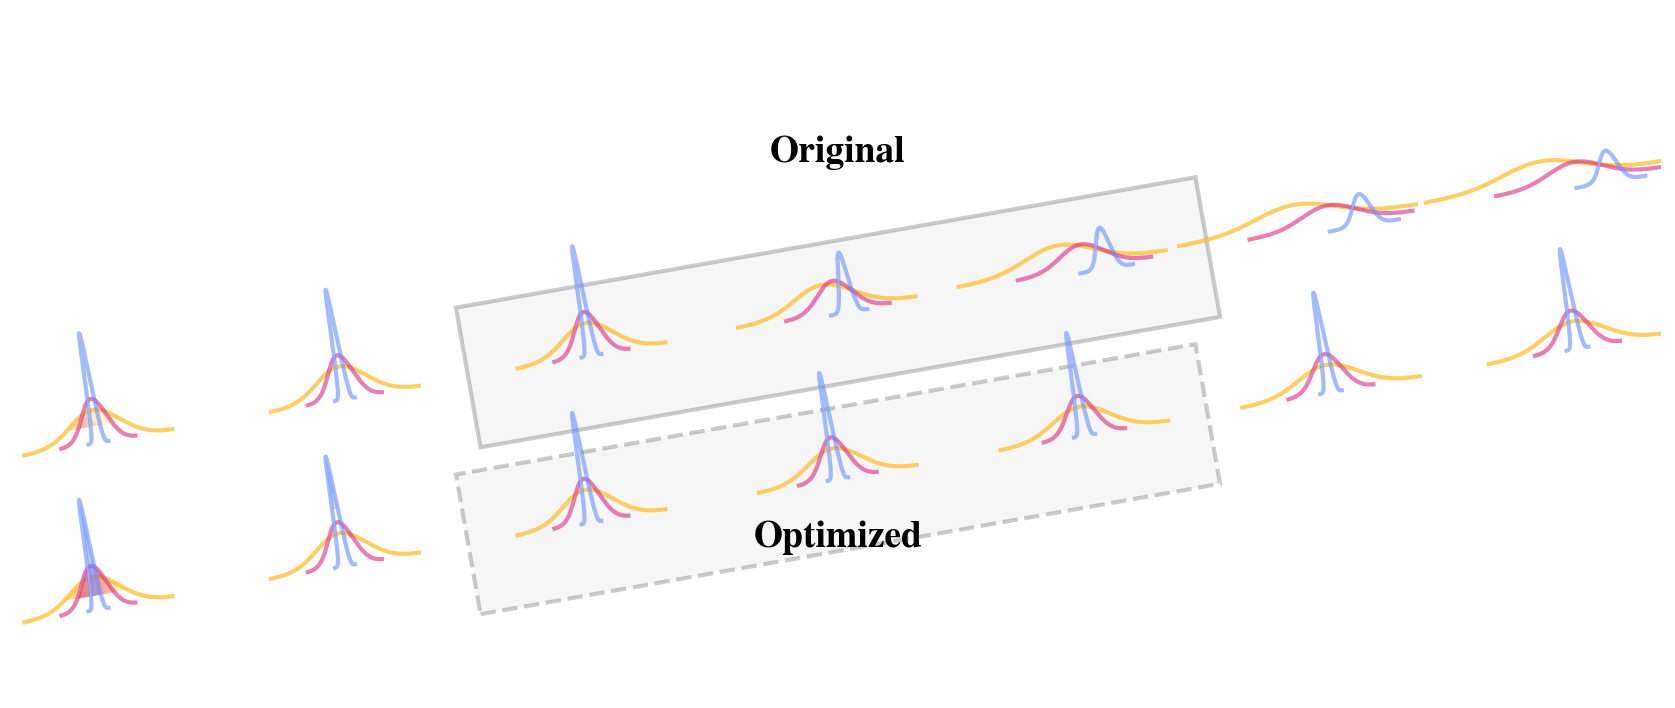

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap

# ============================================================================
# PARAMETERS - Adjust these to control how each Gaussian changes as it propagates
# ============================================================================

# Number of instances: 2 before, 3 during, 2 after crystal
n_before = 2
n_during = 3
n_after = 2
n_instances = n_before + n_during + n_after

# Horizontal spacing between instances
x_spacing = 1.5

# Crystal boundaries (instance indices)
crystal_start_idx = n_before
crystal_end_idx = n_before + n_during

# Baseline y-position for top and bottom rows
baseline_y_top = 1
baseline_y_bottom = 0.0

# Parameters for each of the 3 Gaussians
# Each Gaussian has: amplitude, width (sigma), and how these change
# Area is kept constant: amplitude * width = constant
# So amplitude = area / width

# Define initial areas (constant for each Gaussian)
initial_areas = [0.01, 0.02, 0.03]  # amplitude * width

gaussian_params_top = [
    {
        'name': 'Gaussian 1',
        'color': cs['b'],  # Blue
        'area': initial_areas[0],  # Constant area
        'width': 0.015,
        'center_offset': 0,
        # Evolution parameters (how values change with propagation)
        'width_evolution': lambda i: 0.015 * (1 + i * 2.5),  # Broadens significantly
        'center_evolution': lambda i: i * 0.2,  # Shifts slightly
        'zorder':6,
        'width_extent': 4.0
    },
    {
        'name': 'Gaussian 2',
        'color': cs['m'],  # Magenta
        'area': initial_areas[1],
        'width': 0.075,
        'center_offset': 0,
        'width_evolution': lambda i: 0.075 * (1 + i * 1.2),  # Broadens more
        'center_evolution': lambda i: 0,  # No shift
        'zorder':4,
        'width_extent': 3.0
    },
    {
        'name': 'Gaussian 3',
        'color': cs['y'],  # Yellow
        'area': initial_areas[2],
        'width': 0.15,
        'center_offset': 0,
        'width_evolution': lambda i: 0.15 * (1 + i * 0.6),  # Broadens most
        'center_evolution': lambda i: i * -0.2,  # Shifts most
        'zorder':2,
        'width_extent': 3.0
    },
]

gaussian_params_bottom = [
    {
        'name': 'Gaussian 1',
        'color': cs['b'],  # Blue
        'area': initial_areas[0],
        'width': 0.015,
        'center_offset': 0,
        'width_evolution': lambda i: 0.015 * (1 + i * 0.1),  # Minimal broadening
        'center_evolution': lambda i: 0,  # No shift
        'zorder':6,
        'width_extent': 4.0
    },
    {
        'name': 'Gaussian 2',
        'color': cs['m'],  # magenta
        'area': initial_areas[1],
        'width': 0.075,
        'center_offset': 0,
        'width_evolution': lambda i: 0.075 * (1 + i * 0.15),  # Slight broadening
        'center_evolution': lambda i: 0,  # No shift
        'zorder':4,
        'width_extent': 3.0
    },
    {
        'name': 'Gaussian 3',
        'color': cs['y'],  # yellow
        'area': initial_areas[2],
        'width': 0.15,
        'center_offset': 0,
        'width_evolution': lambda i: 0.15 * (1 + i * 0.2),  # Moderate broadening
        'center_evolution': lambda i: 0,  # No shift
        'zorder':2,
        'width_extent': 3.0
    },
]

# Horizontal range for drawing each Gaussian instance
x_range_extent = 0.6  # How far to extend on each side of center
n_points = 500  # Number of points for smooth curves

# ============================================================================
# HELPER FUNCTIONS
# ============================================================================

def draw_gaussian_with_gradient(ax, x_center, y_center, amplitude, width, color,
                                area, zorder, width_extent=3.0, n_gradient_steps=50,
                                next_gaussian=None):
    """
    Draw a Gaussian with smooth gradient shading from left to right using imshow.
    """
    from matplotlib.patches import PathPatch
    from matplotlib.path import Path
    from matplotlib.colors import to_rgb
    
    # Default full range
    x_min = x_center - width_extent * width
    x_max = x_center + width_extent * width

    # Generate x values over the full range
    x_values = np.linspace(x_min, x_max, n_points)

    # Calculate Gaussian values
    y_gaussian = amplitude * np.exp(-((x_values - x_center)**2) / (2 * width**2))
    
    # Calculate y range
    y_min = y_center
    y_max = y_center + np.max(y_gaussian)
    
    # Create a high-resolution grid for smooth gradient
    nx = 300  # Number of horizontal points
    ny = 150  # Number of vertical points
    
    # Create coordinate arrays
    x_coords = np.linspace(x_min, x_max, nx)
    y_coords = np.linspace(y_min, y_max, ny)
    X, Y = np.meshgrid(x_coords, y_coords)
    
    # Calculate Gaussian values for each x in the grid
    y_gaussian_grid = amplitude * np.exp(-((x_coords - x_center)**2) / (2 * width**2))
    
    # Create alpha gradient from left to right
    # Normalize x position from 0 (left) to 1 (right)
    x_normalized = (X - x_min) / (x_max - x_min)  # 0 to 1 for each point
    # Gradient from left (darker, alpha=0.3) to right (lighter, alpha=0.05)
    alpha_gradient = 0.0 + 0.75 * (1-x_normalized)
    
    # Create mask: only show pixels below the Gaussian curve
    y_gaussian_at_x = np.interp(x_coords, x_values, y_gaussian)
    mask = Y <= (y_center + np.tile(y_gaussian_at_x, (ny, 1)))
    
    # Apply mask to alpha
    alpha_gradient[~mask] = 0
    
    # Convert color to RGB
    rgb_color = to_rgb(color)
    
    # Create RGBA image with gradient alpha
    rgba_image = np.zeros((ny, nx, 4))
    rgba_image[:, :, 0] = rgb_color[0]  # R
    rgba_image[:, :, 1] = rgb_color[1]  # G
    rgba_image[:, :, 2] = rgb_color[2]  # B
    rgba_image[:, :, 3] = alpha_gradient  # A
    
    # Use imshow for smooth rendering
    extent = [x_min, x_max, y_min, y_max]
    im = ax.imshow(rgba_image, extent=extent, aspect='auto', 
                   origin='lower', zorder=zorder, interpolation='bilinear')
    
    # Clip to Gaussian shape using a path
    gaussian_path_verts = list(zip(x_values, y_center + y_gaussian)) + \
                          list(zip(x_values[::-1], [y_center] * len(x_values)))
    gaussian_path = Path(gaussian_path_verts, closed=True)
    clip_patch = PathPatch(gaussian_path, transform=ax.transData)
    im.set_clip_path(clip_patch)

    # Draw outline with lighter opacity
    ax.plot(x_values, y_center + y_gaussian, color=color,
            linewidth=2, zorder=zorder+1, alpha=0.6)
    
    orig_rgb = np.array(to_rgb(color))
    white_rgb = np.array([1.0, 1.0, 1.0])
    whiter_rgb = orig_rgb + 0.4 * (white_rgb - orig_rgb)
    ax.plot(x_values[:200], (y_center + y_gaussian)[:200], color=whiter_rgb, linewidth=1, zorder=zorder+1, alpha=0.6)

def draw_diagram_column(ax, x_center, baseline_y, gaussian_params, instance_idx, 
                       gaussian_y_offsets, is_top=True):
    """
    Draw all 3 Gaussians stacked on top of each other at one instance.
    
    Parameters:
    -----------
    ax : matplotlib axes
    x_center : float
        X position where all Gaussians are centered
    baseline_y : float
        Y position of the baseline for this row
    gaussian_params : list
        List of Gaussian parameter dictionaries
    instance_idx : int
        Which instance we're drawing (0 to n_instances-1)
    gaussian_y_offsets : list
        Y offsets for each Gaussian relative to baseline
    is_top : bool
        True for top row (original), False for bottom row (optimized)
    """
    # Calculate progress through propagation (0 to 1)
    if instance_idx < 2:
        t = 0
    elif instance_idx > n_instances-2:
        t = 1
    else:
        t = (instance_idx-2) / (n_instances - 4)
    
    # Draw each Gaussian
    for gauss_idx, params in enumerate(gaussian_params):
        y_center = baseline_y + gaussian_y_offsets[gauss_idx]
        
        # Calculate evolved parameters
        width = params['width_evolution'](t)
        center_offset = params['center_evolution'](t)
        
        # Calculate amplitude to keep visual area constant
        # Visual area ≈ amplitude * width (for visualization purposes)
        # So amplitude = area / width
        amplitude = params['area'] / width
        
        x_gaussian_center = x_center + center_offset
        
        # Draw Gaussian with gradient
        draw_gaussian_with_gradient(ax, x_gaussian_center, y_center, amplitude, width, 
                                  params['color'], params['area'],params['zorder'],width_extent=params['width_extent'])

# ============================================================================
# CREATE THE FIGURE
# ============================================================================

fig, ax = plt.subplots(figsize=(14, 5), dpi=150)

# Calculate x positions for each instance (horizontal layout)
instance_x_positions = []
for i in range(n_instances):
    x_pos = i * x_spacing + 0.5
    instance_x_positions.append(x_pos)

# Calculate y offsets for the 3 Gaussians within each instance
# They should be stacked on top of each other with small spacing
gaussian_vertical_spacing = 0.0
gaussian_y_offsets = [0, gaussian_vertical_spacing, 2 * gaussian_vertical_spacing]

# Draw crystal region background (horizontal)
crystal_x_start = instance_x_positions[crystal_start_idx] - 0.75
crystal_x_end = instance_x_positions[crystal_end_idx - 1] + 0.75
crystal_y_start_top = baseline_y_top - 0.1
crystal_y_end_top = baseline_y_top + max(gaussian_y_offsets) + 0.75
crystal_y_start_bottom = baseline_y_bottom - 0.1
crystal_y_end_bottom = baseline_y_bottom + max(gaussian_y_offsets) + 0.75

# Draw crystal region for top row with rounded edges
ax.add_patch(FancyBboxPatch(
    (crystal_x_start, crystal_y_start_top),
    crystal_x_end - crystal_x_start,
    crystal_y_end_top - crystal_y_start_top,
    boxstyle="round,pad=0.05,rounding_size=0.20",
    facecolor='lightgray', alpha=0.2, zorder=1, edgecolor='black', linewidth=2
))

# Draw all instances for top row (original)
for instance_idx in range(n_instances):
    x_center = instance_x_positions[instance_idx]
    draw_diagram_column(ax, x_center, baseline_y_top, gaussian_params_top, instance_idx, 
                       gaussian_y_offsets, is_top=True)

# Draw all instances for bottom row (optimized)
for instance_idx in range(n_instances):
    x_center = instance_x_positions[instance_idx]
    draw_diagram_column(ax, x_center, baseline_y_bottom, gaussian_params_bottom, instance_idx, 
                       gaussian_y_offsets, is_top=False)



ax.add_patch(FancyBboxPatch(
    (crystal_x_start, crystal_y_start_bottom),
    crystal_x_end - crystal_x_start,
    crystal_y_end_bottom - crystal_y_start_bottom,
    boxstyle="round,pad=0.05,rounding_size=0.20",
    facecolor='lightgray', alpha=0.2, zorder=1, edgecolor='black', linestyle='--', linewidth=2
))


# Add labels
ax.text(instance_x_positions[n_instances // 2], baseline_y_top + max(gaussian_y_offsets) + 0.85, 'Original', 
        color='black', fontsize=18, ha='center', va='bottom', weight='bold')
ax.text(instance_x_positions[n_instances // 2], baseline_y_bottom - 0.25, 'Optimized', 
        color='black', fontsize=18, ha='center', va='top', weight='bold')



# Set axis properties
x_buffer = 0.5
y_buffer_top = 1
y_buffer_bottom = 0.5

ax.set_xlim(instance_x_positions[0] - x_buffer, instance_x_positions[-1] + x_buffer)
ax.set_ylim(baseline_y_bottom - y_buffer_bottom, 
            baseline_y_top + max(gaussian_y_offsets) + y_buffer_top)
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()